#Preparação


In [ ]:
rm ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
rmdir ~/.kaggle

rmdir: failed to remove '/root/.kaggle': No such file or directory


In [ ]:
pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import requests
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import os
import shutil
from sklearn.utils import resample
from plotly.offline import plot, iplot
from google.colab import files
import cufflinks as cf 
cf.go_offline()
py.offline.init_notebook_mode(connected = True)
import plotly.io as pio
pio.renderers
pio.renderers.default = 'colab'

In [ ]:
!mkdir ~/.kaggle

api_token = {"username":"username","key":"api-key"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

##Pegando os data sets de 2018





In [ ]:
import os 
os.environ['KAGGLE_CONFIG_DIR'] = '/content/sample_data'

In [ ]:
!kaggle datasets download -d arturbritosouza/fies-para-a-pesquisa

100% 1.71G/1.72G [00:20<00:00, 53.4MB/s]
100% 1.72G/1.72G [00:20<00:00, 89.1MB/s]


In [ ]:
!unzip -j "/content/fies-para-a-pesquisa.zip" "FINANCIAMENTO_CONCEDIDOS_SEMESTRE_1_2018.csv" 
!unzip -j "/content/fies-para-a-pesquisa.zip" "FINANCIAMENTO_CONCEDIDOS_SEMESTRE_2_2018.csv" 

Archive:  /content/fies-para-a-pesquisa.zip
  inflating: FINANCIAMENTO_CONCEDIDOS_SEMESTRE_1_2018.csv  
Archive:  /content/fies-para-a-pesquisa.zip
  inflating: FINANCIAMENTO_CONCEDIDOS_SEMESTRE_2_2018.csv  


#Colocando em datasets para analisar


In [ ]:
fields = [
'#SG_UF', 'ST_DEFICIENCIA', 'DS_RACA_COR', 'ST_ENSINO_MEDIO_ESCOLA_PUBLICA', 'DS_TIPO_CURSO', 'DS_CURSO', 'DS_SEXO', 'NO_IES',
'NO_MUNICIPIO', 'NO_AGENTE_FINANCEIRO', 'DS_ESTADO_CIVIL', 'DS_PERIODICIDADE_CUR', 'NU_ANO_PROC', 'NU_MES_PROC' , 'NU_SEMESTRE',
'NU_MES',  'NU_ANO', 'TP_FIANCA', 'VL_REPASSE', 'CO_CONTRATO_FIES', 'VL_PERC_FINANCIAMENTO', 'QT_SEMESTRE_FINANCIADO', 'DT_NASCIMENTO',
'CO_PROCESSO', 'NU_ANO_EXERCICIO_INSC', 'NU_PERCENTUAL_PROUNI', 'NU_PERCENT_SOLICITADO_FINANC', 'VL_MENSALIDADE'
]

In [ ]:
df8 = pd.read_csv('FINANCIAMENTO_CONCEDIDOS_SEMESTRE_1_2018.csv', encoding="ISO-8859-1", sep = ';', usecols=fields)
df17 = pd.read_csv('FINANCIAMENTO_CONCEDIDOS_SEMESTRE_2_2018.csv', encoding="ISO-8859-1", sep = ';', usecols=fields)

In [ ]:
pd.set_option('display.max_columns', 50)
df8

,#SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,TP_FIANCA,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_REPASSE,DT_NASCIMENTO,ST_DEFICIENCIA,ST_ENSINO_MEDIO_ESCOLA_PUBLICA,DS_SEXO,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,286,2321414,Banco do Brasil,2,1,2018,"1287,98",F,2015.0,"0,00","100,00","43997,60",09/01/1986,N,S,Masculino,Casado,Negro,"100,00",10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2018,6
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,286,2321414,Banco do Brasil,1,1,2018,"1287,98",F,2015.0,"0,00","100,00","43997,60",09/01/1986,N,S,Masculino,Casado,Negro,"100,00",10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2018,6
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,286,2321414,Banco do Brasil,5,1,2018,"1287,98",F,2015.0,"0,00","100,00","43997,60",09/01/1986,N,S,Masculino,Casado,Negro,"100,00",10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2018,6
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,286,2321414,Banco do Brasil,3,1,2018,"1287,98",F,2015.0,"0,00","100,00","43997,60",09/01/1986,N,S,Masculino,Casado,Negro,"100,00",10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2018,6
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,286,2321414,Banco do Brasil,4,1,2018,"1287,98",F,2015.0,"0,00","100,00","43997,60",09/01/1986,N,S,Masculino,Casado,Negro,"100,00",10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2018,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6958464,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,290,2825069,Caixa Econômica Federal,2,1,2018,"742,22",F,2017.0,"0,00","87,00","9718,02",16/07/1980,N,S,Feminino,Casado,Pardo,"87,00",7.0,ENFERMAGEM,Bacharelado,Semestral,2018,7
6958465,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,290,2825069,Caixa Econômica Federal,6,1,2018,"742,22",F,2017.0,"0,00","87,00","9718,02",16/07/1980,N,S,Feminino,Casado,Pardo,"87,00",7.0,ENFERMAGEM,Bacharelado,Semestral,2018,7
6958466,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,290,2825069,Caixa Econômica Federal,4,1,2018,"742,22",F,2017.0,"0,00","87,00","9718,02",16/07/1980,N,S,Feminino,Casado,Pardo,"87,00",7.0,ENFERMAGEM,Bacharelado,Semestral,2018,7
6958467,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,290,2825069,Caixa Econômica Federal,5,1,2018,"742,22",F,2017.0,"0,00","87,00","9718,02",16/07/1980,N,S,Feminino,Casado,Pardo,"87,00",7.0,ENFERMAGEM,Bacharelado,Semestral,2018,7


In [ ]:
pd.set_option('display.max_columns', 50)
df17

,#SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,TP_FIANCA,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_REPASSE,DT_NASCIMENTO,ST_DEFICIENCIA,ST_ENSINO_MEDIO_ESCOLA_PUBLICA,DS_SEXO,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,300,1841927,Caixa Econômica Federal,9,2,2018,"770,44",F,2014.0,"0,00","100,00","46976,62",30/10/1987,N,S,Masculino,Solteiro,Branco,"100,00",10.0,DIREITO,Bacharelado,Anual,2018,11
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,300,1841927,Caixa Econômica Federal,8,2,2018,"770,44",F,2014.0,"0,00","100,00","46976,62",30/10/1987,N,S,Masculino,Solteiro,Branco,"100,00",10.0,DIREITO,Bacharelado,Anual,2018,11
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,300,1841927,Caixa Econômica Federal,7,2,2018,"770,44",F,2014.0,"0,00","100,00","46976,62",30/10/1987,N,S,Masculino,Solteiro,Branco,"100,00",10.0,DIREITO,Bacharelado,Anual,2018,11
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,300,1841927,Caixa Econômica Federal,10,2,2018,"770,44",F,2014.0,"0,00","100,00","46976,62",30/10/1987,N,S,Masculino,Solteiro,Branco,"100,00",10.0,DIREITO,Bacharelado,Anual,2018,11
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,302,1841927,Caixa Econômica Federal,11,2,2018,"770,44",F,2014.0,"0,00","100,00","46976,62",30/10/1987,N,S,Masculino,Solteiro,Branco,"100,00",10.0,DIREITO,Bacharelado,Anual,2018,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3636459,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,300,2825022,Caixa Econômica Federal,9,2,2018,"399,36",F,2017.0,"0,00","82,00","12345,71",28/01/1987,N,N,Feminino,União estável,Pardo,"82,00",9.0,ENFERMAGEM,Bacharelado,Semestral,2018,11
3636460,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,300,2825022,Caixa Econômica Federal,10,2,2018,"399,36",F,2017.0,"0,00","82,00","12345,71",28/01/1987,N,N,Feminino,União estável,Pardo,"82,00",9.0,ENFERMAGEM,Bacharelado,Semestral,2018,11
3636461,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,300,2825022,Caixa Econômica Federal,7,2,2018,"399,36",F,2017.0,"0,00","82,00","12345,71",28/01/1987,N,N,Feminino,União estável,Pardo,"82,00",9.0,ENFERMAGEM,Bacharelado,Semestral,2018,11
3636462,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,300,2825022,Caixa Econômica Federal,8,2,2018,"399,36",F,2017.0,"0,00","82,00","12345,71",28/01/1987,N,N,Feminino,União estável,Pardo,"82,00",9.0,ENFERMAGEM,Bacharelado,Semestral,2018,11


In [ ]:
pd.reset_option("^display")

#Tratamento inicial.

###Crindo uma palheta de cores.

In [ ]:
cores = ['#009739', '#FEDD00', '#012169', '#FFFFFF', '#fe9e00', '#e0fe00', '#00fedd', '#0021fe', '#5e00fe', 
         '#dd00fe',  '#131000', '#898675', '#ffd4de', '#fed78d', '#867589', '#fe0021', '#00a0fe', '#3333ff',
         '#336600', '#660033', '#003a32', '#fe0060', '#260005', '#666699', '#66ff99', '#99ffcc', '#ccff99' ]

##Com os dados de 2018.1

###Retirando as repetições

In [ ]:
repeticoes = df8['CO_CONTRATO_FIES'].value_counts()
def custom_rating(contrato):
        return repeticoes[contrato]
        
df8['MESES_CONSEDIDOS'] = df8.apply(lambda x: custom_rating(x['CO_CONTRATO_FIES']),axis=1)

df8

,#SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,286,2321414,Banco do Brasil,2,1,2018,"1287,98",...,Casado,Negro,"100,00",10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2018,6,6
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,286,2321414,Banco do Brasil,1,1,2018,"1287,98",...,Casado,Negro,"100,00",10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2018,6,6
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,286,2321414,Banco do Brasil,5,1,2018,"1287,98",...,Casado,Negro,"100,00",10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2018,6,6
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,286,2321414,Banco do Brasil,3,1,2018,"1287,98",...,Casado,Negro,"100,00",10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2018,6,6
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,286,2321414,Banco do Brasil,4,1,2018,"1287,98",...,Casado,Negro,"100,00",10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2018,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6958464,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,290,2825069,Caixa Econômica Federal,2,1,2018,"742,22",...,Casado,Pardo,"87,00",7.0,ENFERMAGEM,Bacharelado,Semestral,2018,7,6
6958465,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,290,2825069,Caixa Econômica Federal,6,1,2018,"742,22",...,Casado,Pardo,"87,00",7.0,ENFERMAGEM,Bacharelado,Semestral,2018,7,6
6958466,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,290,2825069,Caixa Econômica Federal,4,1,2018,"742,22",...,Casado,Pardo,"87,00",7.0,ENFERMAGEM,Bacharelado,Semestral,2018,7,6
6958467,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,290,2825069,Caixa Econômica Federal,5,1,2018,"742,22",...,Casado,Pardo,"87,00",7.0,ENFERMAGEM,Bacharelado,Semestral,2018,7,6


In [ ]:
df8DuplicateRows = df8[df8.duplicated(subset='CO_CONTRATO_FIES')]
df8DuplicateRows

,#SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,286,2321414,Banco do Brasil,1,1,2018,"1287,98",...,Casado,Negro,"100,00",10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2018,6,6
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,286,2321414,Banco do Brasil,5,1,2018,"1287,98",...,Casado,Negro,"100,00",10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2018,6,6
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,286,2321414,Banco do Brasil,3,1,2018,"1287,98",...,Casado,Negro,"100,00",10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2018,6,6
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,286,2321414,Banco do Brasil,4,1,2018,"1287,98",...,Casado,Negro,"100,00",10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2018,6,6
5,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,290,2321414,Banco do Brasil,6,1,2018,"1288,00",...,Casado,Negro,"100,00",10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2018,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6958464,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,290,2825069,Caixa Econômica Federal,2,1,2018,"742,22",...,Casado,Pardo,"87,00",7.0,ENFERMAGEM,Bacharelado,Semestral,2018,7,6
6958465,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,290,2825069,Caixa Econômica Federal,6,1,2018,"742,22",...,Casado,Pardo,"87,00",7.0,ENFERMAGEM,Bacharelado,Semestral,2018,7,6
6958466,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,290,2825069,Caixa Econômica Federal,4,1,2018,"742,22",...,Casado,Pardo,"87,00",7.0,ENFERMAGEM,Bacharelado,Semestral,2018,7,6
6958467,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,290,2825069,Caixa Econômica Federal,5,1,2018,"742,22",...,Casado,Pardo,"87,00",7.0,ENFERMAGEM,Bacharelado,Semestral,2018,7,6


In [ ]:
df8ComLinhasDuplicads = df8
df8 = df8.drop_duplicates(subset='CO_CONTRATO_FIES')

In [ ]:
df8

,#SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,286,2321414,Banco do Brasil,2,1,2018,"1287,98",...,Casado,Negro,"100,00",10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2018,6,6
6,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,280,1841927,Caixa Econômica Federal,1,1,2018,"830,86",...,Solteiro,Branco,"100,00",10.0,DIREITO,Bacharelado,Anual,2018,5,6
12,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,286,2403582,Banco do Brasil,4,1,2018,"1071,63",...,Solteiro,Pardo,"100,00",10.0,DIREITO,Bacharelado,Anual,2018,6,6
18,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,273,1567557,Banco do Brasil,1,1,2018,"1151,88",...,Solteiro,Branco,"100,00",10.0,DIREITO,Bacharelado,Anual,2018,3,6
24,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,273,1727993,Banco do Brasil,1,1,2018,"1232,13",...,Casado,Negro,"100,00",10.0,DIREITO,Bacharelado,Anual,2018,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6958439,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,280,2819987,Caixa Econômica Federal,1,1,2018,"1540,01",...,Solteiro,Pardo,"62,00",9.0,ODONTOLOGIA,Bacharelado,Semestral,2018,5,6
6958445,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,280,2820695,Caixa Econômica Federal,2,1,2018,"901,97",...,Solteiro,Pardo,"77,00",9.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2018,5,6
6958451,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,286,2822706,Caixa Econômica Federal,1,1,2018,"5000,00",...,Divorciado,Pardo,"67,00",11.0,MEDICINA,Bacharelado,Semestral,2018,6,6
6958457,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,277,2825022,Caixa Econômica Federal,1,1,2018,"832,02",...,União estável,Pardo,"82,00",9.0,ENFERMAGEM,Bacharelado,Semestral,2018,4,6


In [ ]:
df8ComLinhasDuplicads['CO_CONTRATO_FIES'].value_counts()

2428808    60
497168     54
917728     50
661004     48
1214825    44
           ..
1965889     1
2389453     1
397945      1
2757053     1
456665      1
Name: CO_CONTRATO_FIES, Length: 1057998, dtype: int64

###Retirando as linhas que possuem valores nulos

In [ ]:
df8.describe()

,CO_PROCESSO,CO_CONTRATO_FIES,NU_MES,NU_SEMESTRE,NU_ANO,NU_ANO_EXERCICIO_INSC,QT_SEMESTRE_FINANCIADO,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
count,1.057998e+06,1.057998e+06,1.057998e+06,1.057998e+06,1.057998e+06,1.057994e+06,1.057994e+06,1057998.0,1.057998e+06,1.057998e+06
mean,2.813516e+02,1.945567e+06,3.804668e+00,1.215918e+00,2.017344e+03,2.014570e+03,9.004892e+00,2018.0,4.899031e+00,6.577015e+00
std,4.960408e+00,6.357899e+05,3.224679e+00,4.114580e-01,1.233777e+00,1.437582e+00,1.679451e+00,0.0,1.026645e+00,1.880821e+00
min,2.670000e+02,1.113210e+05,1.000000e+00,1.000000e+00,2.010000e+03,2.002000e+03,1.000000e+00,2018.0,2.000000e+00,1.000000e+00
25%,2.770000e+02,1.501916e+06,1.000000e+00,1.000000e+00,2.018000e+03,2.014000e+03,8.000000e+00,2018.0,4.000000e+00,6.000000e+00
50%,2.800000e+02,2.066704e+06,3.000000e+00,1.000000e+00,2.018000e+03,2.014000e+03,1.000000e+01,2018.0,5.000000e+00,6.000000e+00
75%,2.870000e+02,2.474796e+06,5.000000e+00,1.000000e+00,2.018000e+03,2.016000e+03,1.000000e+01,2018.0,6.000000e+00,6.000000e+00
max,2.910000e+02,2.865793e+06,1.200000e+01,2.000000e+00,2.018000e+03,2.018000e+03,3.600000e+01,2018.0,7.000000e+00,6.000000e+01


In [ ]:
df8.isnull().sum().sort_values(ascending=False)

DS_PERIODICIDADE_CUR              518
DS_ESTADO_CIVIL                   178
NU_PERCENTUAL_PROUNI              138
VL_PERC_FINANCIAMENTO               6
NU_PERCENT_SOLICITADO_FINANC        6
ST_ENSINO_MEDIO_ESCOLA_PUBLICA      5
ST_DEFICIENCIA                      5
DT_NASCIMENTO                       5
DS_RACA_COR                         5
DS_SEXO                             5
NU_ANO_EXERCICIO_INSC               4
QT_SEMESTRE_FINANCIADO              4
TP_FIANCA                           2
DS_CURSO                            2
DS_TIPO_CURSO                       2
NO_IES                              2
VL_REPASSE                          2
NU_ANO_PROC                         0
NU_MES_PROC                         0
#SG_UF                              0
NO_MUNICIPIO                        0
VL_MENSALIDADE                      0
NU_ANO                              0
NU_SEMESTRE                         0
NU_MES                              0
NO_AGENTE_FINANCEIRO                0
CO_CONTRATO_

In [ ]:
df8.dropna(axis=0, inplace=True)

In [ ]:
df8.isnull().sum().sort_values(ascending=False)

#SG_UF                            0
DT_NASCIMENTO                     0
NU_MES_PROC                       0
NU_ANO_PROC                       0
DS_PERIODICIDADE_CUR              0
DS_TIPO_CURSO                     0
DS_CURSO                          0
QT_SEMESTRE_FINANCIADO            0
VL_PERC_FINANCIAMENTO             0
DS_RACA_COR                       0
DS_ESTADO_CIVIL                   0
DS_SEXO                           0
ST_ENSINO_MEDIO_ESCOLA_PUBLICA    0
ST_DEFICIENCIA                    0
VL_REPASSE                        0
NO_MUNICIPIO                      0
NU_PERCENT_SOLICITADO_FINANC      0
NU_PERCENTUAL_PROUNI              0
NU_ANO_EXERCICIO_INSC             0
TP_FIANCA                         0
VL_MENSALIDADE                    0
NU_ANO                            0
NU_SEMESTRE                       0
NU_MES                            0
NO_AGENTE_FINANCEIRO              0
CO_CONTRATO_FIES                  0
CO_PROCESSO                       0
NO_IES                      

In [ ]:
df8.describe()

,CO_PROCESSO,CO_CONTRATO_FIES,NU_MES,NU_SEMESTRE,NU_ANO,NU_ANO_EXERCICIO_INSC,QT_SEMESTRE_FINANCIADO,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
count,1.057162e+06,1.057162e+06,1.057162e+06,1.057162e+06,1.057162e+06,1.057162e+06,1.057162e+06,1057162.0,1.057162e+06,1.057162e+06
mean,2.813523e+02,1.945836e+06,3.803101e+00,1.215689e+00,2.017344e+03,2.014571e+03,9.005282e+00,2018.0,4.899168e+00,6.577255e+00
std,4.961009e+00,6.356542e+05,3.223591e+00,4.112995e-01,1.233307e+00,1.437427e+00,1.679588e+00,0.0,1.026738e+00,1.881174e+00
min,2.670000e+02,1.113210e+05,1.000000e+00,1.000000e+00,2.010000e+03,2.002000e+03,1.000000e+00,2018.0,2.000000e+00,1.000000e+00
25%,2.770000e+02,1.502274e+06,1.000000e+00,1.000000e+00,2.018000e+03,2.014000e+03,8.000000e+00,2018.0,4.000000e+00,6.000000e+00
50%,2.800000e+02,2.066936e+06,3.000000e+00,1.000000e+00,2.018000e+03,2.014000e+03,1.000000e+01,2018.0,5.000000e+00,6.000000e+00
75%,2.870000e+02,2.474973e+06,5.000000e+00,1.000000e+00,2.018000e+03,2.016000e+03,1.000000e+01,2018.0,6.000000e+00,6.000000e+00
max,2.910000e+02,2.865793e+06,1.200000e+01,2.000000e+00,2.018000e+03,2.018000e+03,3.600000e+01,2018.0,7.000000e+00,6.000000e+01


###Criando a coluna de região, baseado nos estados.

In [ ]:
df8['REGIAO'] = df8['#SG_UF']

In [ ]:
df8['REGIAO']= df8['REGIAO'].replace(['AM','RR', 'AP', 'PA', 'TO', 'RO', 'AC'], 'NORTE')
df8['REGIAO']= df8['REGIAO'].replace(['MA','PI', 'CE', 'RN', 'PB', 'PE', 'SE', 'AL', 'BA'], 'NORDESTE')
df8['REGIAO']= df8['REGIAO'].replace(['MT','MS', 'GO', 'DF'], 'CENTRO-OESTE')
df8['REGIAO']= df8['REGIAO'].replace(['SP','RJ', 'ES', 'MG'], 'SUDESTE')
df8['REGIAO']= df8['REGIAO'].replace(['PR','RS', 'SC'], 'SUL')

###Criando a coluna categoria de ciencia do curso, para separar os cursos em 8 categorias definidas pela capes

In [ ]:
df8['CATEGORIA_CIENCIA_CURSO'] = df8['DS_CURSO']

In [ ]:
df8['CATEGORIA_CIENCIA_CURSO']= df8['CATEGORIA_CIENCIA_CURSO'].replace(['DIREITO','ADMINISTRAÇÃO', 'CIÊNCIAS CONTÁBEIS', 'ARQUITETURA E URBANISMO',
'DESIGN GRÁFICO', 'SERVIÇO SOCIAL', 'COMUNICAÇÃO SOCIAL - PUBLICIDADE E PROPAGANDA', 'JORNALISMO', 'GESTÃO DE RECURSOS HUMANOS','COMÉRCIO INTERNACIONAL', 
'RELAÇÕES INTERNACIONAIS','GASTRONOMIA', 'COMUNICAÇÃO SOCIAL', 'CIÊNCIAS ECONÔMICAS', 'PUBLICIDADE E PROPAGANDA', 'COMUNICAÇÃO SOCIAL - JORNALISMO', 
'DESIGN DE INTERIORES', 'EVENTOS', 'MARKETING', 'GESTÃO DA TECNOLOGIA DA INFORMAÇÃO', 'TURISMO', 'GESTÃO FINANCEIRA', 'RELAÇÕES PÚBLICAS', 
'BIBLIOTECONOMIA', 'GESTÃO COMERCIAL', 'COMÉRCIO EXTERIOR', 'PROCESSOS GERENCIAIS', 'SEGURANÇA NO TRABALHO', 'GESTÃO DA PRODUÇÃO INDUSTRIAL', 
'TERAPIA OCUPACIONAL', 'HOTELARIA', 'COMUNICAÇÃO SOCIAL - RELAÇÕES PÚBLICAS', 'SECRETARIADO EXECUTIVO', 'DESIGN DE PRODUTO', 'DESENHO INDUSTRIAL', 
'CIÊNCIAS SOCIAIS', 'GESTÃO DA QUALIDADE', 'NEGÓCIOS INTERNACIONAIS', 'COMUNICAÇÃO SOCIAL -RADIALISMO - PRODUÇÃO EM MÍDIA AUDIOVISUAL', 
'PROPAGANDA E MARKETING', 'GESTÃO DE SEGURANÇA PRIVADA', 'GESTÃO HOSPITALAR', 'GESTÃO PÚBLICA', 'GESTÃO PORTUÁRIA', 'SECRETARIADO', 
'SECRETARIADO EXECUTIVO TRILÍNGUE', 'ADMINISTRAÇÃO DE EMPRESAS', 'RÁDIO, TV E INTERNET', 'GESTÃO DE MICRO E PEQUENAS EMPRESAS', 'TURISMO E HOTELARIA',
'DESENHO INDUSTRIAL - DESIGN DIGITAL', 'PRODUÇÃO PUBLICITÁRIA', 'GESTÃO FINANCEIRA E CONTROLADORIA EMPRESARIAL', 'NEGÓCIOS DA MODA', 
'TELEMÁTICA', 'NEGÓCIOS IMOBILIÁRIOS', 'SECRETARIADO EXECUTIVO BILÍNGUE', 'MARKETING E PROPAGANDA', 'COMUNICAÇÃO E MULTIMEIOS', ''
'CIÊNCIA POLÍTICA', 'SEGURANÇA PÚBLICA', 'ADMINISTRAÇÃO PÚBLICA', 'GESTÃO DE VAREJO', 'GESTÃO DE PESSOAS', 'DESENHO INDUSTRIAL - PROJETO DO PRODUTO',
'DESENHO INDUSTRIAL - PROGRAMAÇÃO VISUAL', 'CIÊNCIA ECONÔMICA', 'COMUNICAÇÃO ASSISTIVA', 'SEGURANÇA DO TRABALHO', 'DESENHO INDUSTRIAL - DESIGN DE MODA',
'ESTUDOS SOCIAIS', 'ADMINISTRAÇÃO COM HABILITAÇÃO EM ADMINISTRAÇÃO DE EMPRESAS', 'PSICOPEDAGOGIA CLÍNICA E INSTITUCIONAL', 'GESTÃO DE PRODUÇÃO INDUSTRIAL',
'GESTÃO EMPRESARIAL E CONTROLADORIA', 'GESTÃO DE TURISMO', 'CIÊNCIAS POLÍTICAS', 'TURISMO E LAZER', 'GESTÃO DE TECNOLOGIA DA INFORMAÇÃO', 
'GESTÃO DA QUALIDADE E SEGURANÇA DO TRABALHO', 'GESTÃO DE QUALIDADE EM METROLOGIA', 'LOGÍSTICA', 'SECRETARIADO EXECUTIVO - BILÍNGUE', 'GESTÃO DO AGRONEGÓCIO',
'COMUNICAÇÃO SOCIAL COM HABILITAÇÃO EM PUBLICIDADE E PROPAGANDA', 'COMUNICAÇÃO E MARKETING', 'SEGURANÇA PRIVADA', 'GESTÃO DE TELECOMUNICAÇÕES',
'SERVIÇOS PENAIS', 'NORMAL  SUPERIOR', 'GESTÃO DE SERVIÇOS JUDICIÁRIOS E NOTARIAIS', 'SECRETARIADO EXECUTIVO BILINGUE - PORTUGUÊS/INGLÊS',
'GESTÃO DE SEGUROS', 'ECONOMIA', 'ORGANIZAÇÃO DE SERVIÇOS JUDICIÁRIOS', 'GESTÃO DE COOPERATIVAS', 'COMÉRCIO EXTERIOR E NEGÓCIOS INTERNACIONAIS',
'GESTÃO EXECUTIVA DE NEGÓCIOS', 'HOTELARIA HOSPITALAR', 'GESTÃO DE SISTEMAS DE INFORMAÇÃO', 'PLANEJAMENTO LOGÍSTICO DE CARGAS'
], 
'Ciências Sociais Aplicadas')


df8['CATEGORIA_CIENCIA_CURSO']= df8['CATEGORIA_CIENCIA_CURSO'].replace(['ENFERMAGEM','MEDICINA', 'FISIOTERAPIA', 'ODONTOLOGIA',
'FARMÁCIA', 'EDUCAÇÃO FÍSICA', 'NUTRIÇÃO', 'BIOMEDICINA', 'FONOAUDIOLOGIA', 'FARMÁCIA E BIOQUÍMICA', 'QUIROPRAXIA', 'CIÊNCIAS BIOLÓGICAS - MODALIDADE MÉDICA',
'OPTOMETRIA', 'CIÊNCIAS FARMACÊUTICAS', 'ORTÓPTICA', 'FÍSICA MÉDICA', 'COSMÉTICOS', 'VISAGISMO E TERAPIA CAPILAR', 'ESTÉTICA CAPILAR',
'COSMETOLOGIA E ESTÉTICA', 'ESTÉTICA', 'ESTÉTICA E COSMETOLOGIA', 'ESTÉTICA E COSMÉTICA', 'MUSICOTERAPIA', 'ÓPTICA E OPTOMETRIA', 'SAÚDE COLETIVA', 'PODOLOGIA',
'VISAGISMO E TERAPIAS CAPILARES', 'SISTEMAS BIOMÉDICOS', 'ATIVIDADE FÍSICA E ESPORTE', 'OFTÁLMICA'
], 
'Ciências da Saúde')


df8['CATEGORIA_CIENCIA_CURSO']= df8['CATEGORIA_CIENCIA_CURSO'].replace(['SISTEMAS DE INFORMAÇÃO','CIÊNCIA DA COMPUTAÇÃO',
'ANÁLISE E DESENVOLVIMENTO DE SISTEMAS', 'MATEMÁTICA', 'SISTEMA DE INFORMAÇÃO', 'QUÍMICA', 'REDES DE COMPUTADORES', 'PILOTAGEM PROFISSIONAL DE AERONAVES',
'PETRÓLEO E GÁS', 'SISTEMAS PARA INTERNET', 'CIÊNCIAS AERONÁUTICAS', 'AUTOMAÇÃO INDUSTRIAL', 'QUÍMICA INDUSTRIAL', 'MECATRÔNICA INDUSTRIAL', 'FÍSICA',
'JOGOS DIGITAIS', 'MANUTENÇÃO INDUSTRIAL', 'INFORMÁTICA', 'CIÊNCIAS', 'PRODUÇÃO SUCROALCOOLEIRA', 'OCEANOGRAFIA', 'CIÊNCIAS ATUARIAIS', 'CIÊNCIAS EXATAS',
'FABRICAÇÃO MECÂNICA', 'CONSTRUÇÃO NAVAL', 'PROCESSOS QUÍMICOS', 'COMPUTAÇÃO', 'MANUTENÇÃO DE AERONAVES', 'GEOLOGIA', 'CONSTRUÇÃO DE EDIFÍCIOS', 
'AVIAÇÃO CIVIL', 'BIOCOMBUSTÍVEIS', 'TECNOLOGIA DE SOLDAGEM', 'SEGURANÇA DA INFORMAÇÃO', 'ELETROTÉCNICA INDUSTRIAL', 'SISTEMAS DE TELECOMUNICAÇÕES',
'PRODUÇÃO DE PETRÓLEO E GÁS', 'PRODUÇÃO DE VESTUÁRIO', 'SISTEMAS AUTOMOTIVOS', 'WEB DESIGN', 'INSPEÇÃO DE EQUIPAMENTOS E DE SOLDAGEM', 'PROCESSOS METALÚRGICOS',
'POLÍMEROS', 'REDES DE TELECOMUNICAÇÕES', 'BANCO DE DADOS', 'ANÁLISE DE SISTEMAS DE INFORMAÇÃO', 'SISTEMAS ELÉTRICOS', 'GEOGRAFIA E MEIO AMBIENTE',
'QUÍMICA TECNOLÓGICA', 'ANÁLISE DE SISTEMAS', 'GESTÃO DE AMBIENTES INTERNET E REDES DE COMPUTADORES', 'CIÊNCIAS DA COMPUTAÇÃO', 'ENGENHARIA DE SOFTWARE',
'GERENCIAMENTO DE REDES DE COMPUTADORES', 'ELETRÔNICA INDUSTRIAL', 'ENERGIAS RENOVÁVEIS', 'TECNOLOGIAS DIGITAIS', 'COMPUTAÇÃO GRÁFICA',
'SISTEMAS EMBARCADOS', 'DESENVOLVIMENTO DE SISTEMAS', 'TRANSPORTE AÉREO'
], 
'Ciências Exatas e da Terra')

df8['CATEGORIA_CIENCIA_CURSO']= df8['CATEGORIA_CIENCIA_CURSO'].replace(['ENGENHARIA CIVIL','ENGENHARIA DE PRODUÇÃO', 'ENGENHARIA MECÂNICA',
'ENGENHARIA ELÉTRICA', 'ENGENHARIA AMBIENTAL', 'ENGENHARIA QUÍMICA', 'ENGENHARIA DE CONTROLE E AUTOMAÇÃO', 'ENGENHARIA AMBIENTAL E SANITÁRIA',
'ENGENHARIA DE COMPUTAÇÃO', 'ENGENHARIA DE PRODUÇÃO MECÂNICA', 'ENGENHARIA DE PETRÓLEO', 'ENGENHARIA', 'ENGENHARIA DE TELECOMUNICAÇÕES',
'ENGENHARIA AGRONÔMICA', 'ENGENHARIA ELÉTRICA E ELETRÔNICA', 'ENGENHARIA ELETRÔNICA E DE TELECOMUNICAÇÕES', 'ENGENHARIA DA COMPUTAÇÃO', 'ENGENHARIA FLORESTAL',
'ENGENHARIA DE PETRÓLEO E GÁS', 'ENGENHARIA ELETRÔNICA', 'ENGENHARIA METALÚRGICA', 'ENGENHARIA MECATRÔNICA', 'ENGENHARIA BIOMÉDICA', 'ENGENHARIA AGRÍCOLA',
'ENGENHARIA DE ENERGIA', 'ENGENHARIA BIOENERGÉTICA', 'ENGENHARIA DE MINAS', 'ENGENHARIA INDUSTRIAL MECÂNICA', 'ENGENHARIA MECÂNICA AUTOMOTIVA',
'ENGENHARIA CIVIL E AMBIENTAL', 'ENGENHARIA DE MATERIAIS', 'ENGENHARIA AERONÁUTICA', 'ENGENHARIA DE PRODUÇÃO E QUALIDADE', 'ENGENHARIA AERONÁUTICA E ESPAÇO',
'ENGENHARIA DE PRODUÇÃO CIVIL', 'ENGENHARIA DE ENERGIAS RENOVÁVEIS E AMBIENTE', 'ENGENHARIA ELETROTÉCNICA', 'ENGENHARIA CERÂMICA', 'ENGENHARIA INDUSTRIAL QUÍMICA',
'ENGENHARIA AMBIENTAL E ENERGIAS RENOVÁVEIS', 'ENGENHARIA DE BIOPROCESSOS E BIOTECNOLOGIA', 'ENGENHARIA DE AGRIMENSURA', 'ENGENHARIA DE AUTOMAÇÃO E CONTROLE',
'ENGENHARIA DE BIOPROCESSOS', 'ENGENHARIA AUTOMOTIVA', 'ENGENHARIA DE AUTOMAÇÃO E SISTEMAS', 'ENGENHARIA DE PRODUÇÃO QUÍMICA', 'ENGENHARIA DE MATERIAIS E NANOTECNOLOGIA',
'ENGENHARIA TÊXTIL', 'ENGENHARIA DE ENERGIAS RENOVÁVEIS', 'ENGENHARIA CARTOGRÁFICA E DE AGRIMENSURA', 'ENGENHARIA DE ENERGIAS', 'ENGENHARIA DE SEGURANÇA NO TRABALHO'
], 
'Engenharias')

df8['CATEGORIA_CIENCIA_CURSO']= df8['CATEGORIA_CIENCIA_CURSO'].replace(['CIÊNCIAS BIOLÓGICAS','RADIOLOGIA', 'BIOTECNOLOGIA', 'BIOLOGIA',
'CIÊNCIAS - BIOLOGIA', 'BIOPROCESSOS E BIOTECNOLOGIA', 'CIÊNCIAS BIOLÓGICAS - LICENCIATURA OU BACHARELADO'
], 
'Ciências Biológicas')

df8['CATEGORIA_CIENCIA_CURSO']= df8['CATEGORIA_CIENCIA_CURSO'].replace(['MEDICINA VETERINÁRIA','AGRONOMIA', 'GESTÃO AMBIENTAL', 'AGRONEGÓCIO', 'ZOOTECNIA',
'ALIMENTOS', 'ENGENHARIA DE ALIMENTOS', 'QUÍMICA AMBIENTAL', 'SILVICULTURA', 'ECOLOGIA', 'PRODUÇÃO AGRÍCOLA', 'GESTÃO DE EQUINOCULTURA',
'CIÊNCIAS AMBIENTAIS', 'GESTÃO DO MEIO AMBIENTE', 'ENGENHARIA AGRÍCOLA E AMBIENTAL', 'AGROPECUÁRIA', 'NATUROLOGIA', 'GESTÃO EM SAÚDE AMBIENTAL',
'CAFEICULTURA', 'LATICÍNIOS'
], 
'Ciências Agrárias')

df8['CATEGORIA_CIENCIA_CURSO']= df8['CATEGORIA_CIENCIA_CURSO'].replace(['PSICOLOGIA','PEDAGOGIA', 'HISTÓRIA', 'GEOGRAFIA', 'FILOSOFIA', 'TEOLOGIA',
'SOCIOLOGIA', 'EDUCAÇÃO NAS ORGANIZAÇÕES', 'MINERAÇÃO', 'SOCIOLOGIA E POLÍTICA', 'ARQUEOLOGIA', 'CIÊNCIAS TEOLÓGICAS', 'ONTOPSICOLOGIA', 'CIÊNCIAS DA RELIGIÃO'
], 
'Ciências Humanas')

df8['CATEGORIA_CIENCIA_CURSO']= df8['CATEGORIA_CIENCIA_CURSO'].replace(['LETRAS - PORTUGUÊS E INGLÊS','LETRAS - INGLÊS', 'LETRAS', 'LETRAS - LÍNGUA PORTUGUESA',
'ARTES VISUAIS', 'CINEMA E AUDIOVISUAL', 'LETRAS - PORTUGUÊS E ESPANHOL', 'MÚSICA', 'LETRAS - ESPANHOL', 'PRODUÇÃO AUDIOVISUAL', 'FOTOGRAFIA', 'LETRAS - PORTUGUÊS',
'LETRAS - PORTUGUÊS E INGLÊS E RESPECTIVAS LITERATURAS', 'PRODUÇÃO FONOGRÁFICA', 'AUDIOVISUAL', 'DESIGN DE MODA - ESTILISMO', 'DESIGN', 'DESIGN DE MODA',
'MODA', 'LETRAS - TRADUTOR E INTÉRPRETE', 'ÁUDIO VISUAL E NOVAS MÍDIAS', 'PRODUÇÃO MULTIMÍDIA', 'COMUNICAÇÃO SOCIAL - CINEMA E MÍDIAS DIGITAIS', 
'COMUNICAÇÃO SOCIAL - HABILITAÇÃO REALIZAÇÃO AUDIOVISUAL', 'DESIGN DIGITAL', 'DESIGN DE MODA - MODELAGEM', 'ARTES', 'COMUNICAÇÃO DAS ARTES DO CORPO',
'DESIGN DE GAMES', 'COMUNICAÇÃO SOCIAL - FOTOGRAFIA', 'COMUNICAÇÃO SOCIAL - CINEMA', 'COMUNICAÇÃO SOCIAL - RADIALISMO (RÁDIO E TV)',
'COMUNICAÇÃO SOCIAL - RADIO E TELEVISÃO', 'DANÇA', 'TEATRO', 'COMUNICAÇÃO SOCIAL - PRODUÇÃO EDITORIAL', 'EDUCAÇÃO ARTÍSTICA', 
'LETRAS - TRADUÇÃO INGLÊS E PORTUGUÊS', 'TECNOLOGIA E MÍDIAS DIGITAIS', 'COMUNICAÇÃO SOCIAL - MÍDIA ELETRÔNICA', 'LETRAS PORTUGUÊS E INGLÊS', 
'MÚSICA - REGÊNCIA', 'LETRAS - LÍNGUA FRANCESA', 'ARTE: HISTÓRIA, CRÍTICA E CURADORIA', 'MÚSICA - EDUCAÇÃO MUSICAL', 
'LETRAS - PORTUGUÊS E LITERATURAS DA LÍNGUA PORTUGUESA', 'EDUCAÇÃO ARTÍSTICA - MÚSICA', 'LETRAS - FRANCÊS', 'LETRAS PORTUGUÊS E ESPANHOL E RESPECTIVAS LITERATURAS',
'TRADUTOR E INTÉRPRETE', 'ARTES VISUAIS, PINTURA, GRAVURA E ESCULTURA', 'COMUNICAÇÃO SOCIAL - COMUNICAÇÃO DIGITAL', 'COMUNICAÇÃO SOCIAL - RADIALISMO',
'PRODUTORES E MÚSICOS DE ROCK', 'COMUNICAÇÃO SOCIAL - CINEMA DIGITAL', 'ESTÉTICA E IMAGEM PESSOAL', 'BELEZA, ESTÉTICA E IMAGEM PESSOAL', 'COMUNICAÇÃO SOCIAL - CINEMA E VÍDEO',
'LETRAS - INGLÊS - TRADUÇÃO E INTERPRETAÇÃO', 'CINEMA', 'DESENHO DE ANIMAÇÃO', 'COMUNICAÇÃO SOCIAL  - RADIALISMO', 'ESTÉTICA, BELEZA E IMAGEM PESSOAL', 
'LETRAS - LÍNGUA PORTUGUESA, LÍNGUA INGLESA E RESPECTIVAS LITERATURAS', 'LETRAS COM PORTUGUÊS E ESPANHOL', 'ESTILISMO', 'COMUNICAÇÃO SOCIAL - CINEMA E AUDIOVISUAL',
'ARTES CÊNICAS', 'LETRAS - LÍNGUA PORTUGUESA E LITERATURAS DE LÍNGUA PORTUGUESA', 'COSMÉTICA', 'LETRAS - LÍNGUA INGLESA E RESPECTIVAS LITERATURAS',
'COMUNICAÇÃO SOCIAL - RÁDIO, TV E INTERNET', 'DESIGN DE ANIMAÇÃO', 'PRODUÇÃO CÊNICA', 'MÚSICA - MÚSICA POPULAR BRASILEIRA', 'COMUNICAÇÃO SOCIAL - RÁDIO, TV E MULTIMÍDIA',
'PRODUÇÃO CULTURAL', 'LETRAS - LÍNGUA PORTUGUESA E LIBRAS', 'PRODUÇÃO EM MÍDIA AUDIOVISUAL', 'CANTO', 'MÚSICA - CORDAS', 'GESTÃO DESPORTIVA E DE LAZER',
'COMUNICAÇÃO SOCIAL - EDITORAÇÃO', 'ARTE', 'TRADUÇÃO E INTERPRETAÇÃO', 'MÚSICA - INSTRUMENTO', 'ESCRITA CRIATIVA', 'MÍDIAS SOCIAIS DIGITAIS'
], 
'Linguística, Letras e Artes')


transformando o valor repassado e o valor mensalidade em float.

In [ ]:
df8['VL_REPASSE'] = df8['VL_REPASSE'].astype('str')
df8['VL_REPASSE'] = df8['VL_REPASSE'].str.replace(',', '.')
df8['VL_REPASSE']  = pd.to_numeric(df8['VL_REPASSE'], errors='coerce')

df8['VL_MENSALIDADE'] = df8['VL_MENSALIDADE'].astype('str')
df8['VL_MENSALIDADE'] = df8['VL_MENSALIDADE'].str.replace(',', '.')
df8['VL_MENSALIDADE']  = pd.to_numeric(df8['VL_MENSALIDADE'], errors='coerce')

###Criando a coluna VALOR_SEMESTRE_PAGO, para representar quanto o aluno recebeu especificamente no semestre analisado. Criado multiplicando o valor de 1 parcela de pagamento x quantas vezes ele aparece no data_frame, que foi armazenado na coluna MESES_CONSEDIDO, mas limitando a 6 meses máximos (pagamentos que não são mensais terão menos que 6 meses na coluna MESES_CONSEDIDOS, teoricamente.

In [ ]:
df8['VALOR_SEMESTRE_PAGO'] = np.where(df8['MESES_CONSEDIDOS'] > 6,
                                           df8['VL_MENSALIDADE'] * 6,
                                           df8['VL_MENSALIDADE'] * df8['MESES_CONSEDIDOS'])

###Criando a coluna VALOR_ARQUIVO_PAGO, para representar quanto o aluno recebeu de acordo com as informações disponiveis no arquivo. Criado multiplicando o valor de 1 parcela de pagamento x quantas vezes ele aparece no data_frame, que foi armazenado na coluna MESES_CONSEDIDOS.

In [ ]:
df8['VALOR_ARQUIVO_PAGO'] = df8['VL_MENSALIDADE'] * df8['MESES_CONSEDIDOS']

###Criando a coluna DIFERENÇA_REPASSADO_REPASSE_ARQUIVO, criada para verificar a grau de diferença entre a coluna VL_REPASSE e a coluna VALOR_SEMESTRE_PAGO, pois existem casos em que o contrato do aluno é feito com mais semestre do que o especificado, gerando um pagamento 

In [ ]:
df8['MESES_CONSEDIDOS'].value_counts()

6     951899
12     95599
18      2784
4       2337
5       1383
3        907
2        493
10       361
11       337
8        310
24       224
14       157
9        146
30        75
36        26
16        25
42        19
1         16
7         15
20         8
15         7
17         6
32         5
38         5
44         4
23         3
26         2
54         1
50         1
29         1
48         1
39         1
22         1
35         1
60         1
19         1
Name: MESES_CONSEDIDOS, dtype: int64

In [ ]:
df8['DIFERENÇA_REPASSADO_REPASSE_ARQUIVO'] = df8['VL_REPASSE'] - df8['VALOR_ARQUIVO_PAGO']

In [ ]:
df8["DIFERENÇA_REPASSADO_REPASSE_ARQUIVO"].value_counts()

44233.49    321
47945.89    227
45147.38    216
37928.24    199
45481.96    191
           ... 
40469.14      1
8186.57       1
86629.92      1
35460.36      1
5264.70       1
Name: DIFERENÇA_REPASSADO_REPASSE_ARQUIVO, Length: 883867, dtype: int64

# Esse é o primeiro arquivo que analisamos que o número que mais aparece não é 0.00, representando que a diferença dentre esses dois valores é bem maior do o dos outros anos analisados, o que é ruim para nossa análise. Dessa forma, nas análises de valores, seram avaliados de três formas, com o valor repassado bruto do arquivo, com o valor repassado do semestre, pois cada semestre está sendo avaliado separadamente, e com o novo valor repassado, da multiplicação da mensalidade com quantas vezes ele aparece no arquivo (a repetição de linhas), devido aos problemas causado pelo fato de que com as repetições de linha, usando apenas o valor repassado, o valor será muito maior do que o verdadeiro, pois contrartos aparecem em multiplos semestres diferntes, afrimando o valor repassado total do contrato. O valor real estará entre o valor mostrado entre VL_REPASSE e VALOR_ARQUIVO_PAGO, mas da forma que as informações foram disponibilizadas, não é possivel determinar com exatidão.

##Com os dados de 2018.2

###Retirando as repetições

In [ ]:
repeticoes = df17['CO_CONTRATO_FIES'].value_counts()
def custom_rating(contrato):
        return repeticoes[contrato]
        
df17['MESES_CONSEDIDOS'] = df17.apply(lambda x: custom_rating(x['CO_CONTRATO_FIES']),axis=1)

df17

,#SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,300,1841927,Caixa Econômica Federal,9,2,2018,"770,44",...,Solteiro,Branco,"100,00",10.0,DIREITO,Bacharelado,Anual,2018,11,5
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,300,1841927,Caixa Econômica Federal,8,2,2018,"770,44",...,Solteiro,Branco,"100,00",10.0,DIREITO,Bacharelado,Anual,2018,11,5
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,300,1841927,Caixa Econômica Federal,7,2,2018,"770,44",...,Solteiro,Branco,"100,00",10.0,DIREITO,Bacharelado,Anual,2018,11,5
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,300,1841927,Caixa Econômica Federal,10,2,2018,"770,44",...,Solteiro,Branco,"100,00",10.0,DIREITO,Bacharelado,Anual,2018,11,5
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,302,1841927,Caixa Econômica Federal,11,2,2018,"770,44",...,Solteiro,Branco,"100,00",10.0,DIREITO,Bacharelado,Anual,2018,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3636459,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,300,2825022,Caixa Econômica Federal,9,2,2018,"399,36",...,União estável,Pardo,"82,00",9.0,ENFERMAGEM,Bacharelado,Semestral,2018,11,5
3636460,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,300,2825022,Caixa Econômica Federal,10,2,2018,"399,36",...,União estável,Pardo,"82,00",9.0,ENFERMAGEM,Bacharelado,Semestral,2018,11,5
3636461,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,300,2825022,Caixa Econômica Federal,7,2,2018,"399,36",...,União estável,Pardo,"82,00",9.0,ENFERMAGEM,Bacharelado,Semestral,2018,11,5
3636462,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,300,2825022,Caixa Econômica Federal,8,2,2018,"399,36",...,União estável,Pardo,"82,00",9.0,ENFERMAGEM,Bacharelado,Semestral,2018,11,5


In [ ]:
df17DuplicateRows = df17[df17.duplicated(subset='CO_CONTRATO_FIES')]
df17DuplicateRows

,#SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,300,1841927,Caixa Econômica Federal,8,2,2018,"770,44",...,Solteiro,Branco,"100,00",10.0,DIREITO,Bacharelado,Anual,2018,11,5
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,300,1841927,Caixa Econômica Federal,7,2,2018,"770,44",...,Solteiro,Branco,"100,00",10.0,DIREITO,Bacharelado,Anual,2018,11,5
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,300,1841927,Caixa Econômica Federal,10,2,2018,"770,44",...,Solteiro,Branco,"100,00",10.0,DIREITO,Bacharelado,Anual,2018,11,5
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,302,1841927,Caixa Econômica Federal,11,2,2018,"770,44",...,Solteiro,Branco,"100,00",10.0,DIREITO,Bacharelado,Anual,2018,12,5
6,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,296,1567557,Banco do Brasil,7,2,2018,"1155,66",...,Solteiro,Branco,"100,00",10.0,DIREITO,Bacharelado,Anual,2018,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3636458,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,302,2822706,Caixa Econômica Federal,11,2,2018,"6336,88",...,Divorciado,Pardo,"86,00",11.0,MEDICINA,Bacharelado,Semestral,2018,12,5
3636460,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,300,2825022,Caixa Econômica Federal,10,2,2018,"399,36",...,União estável,Pardo,"82,00",9.0,ENFERMAGEM,Bacharelado,Semestral,2018,11,5
3636461,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,300,2825022,Caixa Econômica Federal,7,2,2018,"399,36",...,União estável,Pardo,"82,00",9.0,ENFERMAGEM,Bacharelado,Semestral,2018,11,5
3636462,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,300,2825022,Caixa Econômica Federal,8,2,2018,"399,36",...,União estável,Pardo,"82,00",9.0,ENFERMAGEM,Bacharelado,Semestral,2018,11,5


In [ ]:
df17ComLinhasDuplicads = df17
df17 = df17.drop_duplicates(subset='CO_CONTRATO_FIES')

In [ ]:
df17

,#SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,300,1841927,Caixa Econômica Federal,9,2,2018,"770,44",...,Solteiro,Branco,"100,00",10.0,DIREITO,Bacharelado,Anual,2018,11,5
5,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,296,1567557,Banco do Brasil,8,2,2018,"1155,66",...,Solteiro,Branco,"100,00",10.0,DIREITO,Bacharelado,Anual,2018,9,5
10,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,298,1727993,Banco do Brasil,8,2,2018,"1251,96",...,Casado,Negro,"100,00",10.0,DIREITO,Bacharelado,Anual,2018,10,5
15,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,298,1533616,Caixa Econômica Federal,8,2,2018,"929,05",...,Solteiro,Negro,"100,00",10.0,PSICOLOGIA,Bacharelado,Anual,2018,10,5
20,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,302,1566390,Caixa Econômica Federal,10,2,2018,"1251,96",...,Solteiro,Pardo,"100,00",10.0,DIREITO,Bacharelado,Anual,2018,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3636439,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,298,2819848,Caixa Econômica Federal,8,2,2018,"5324,49",...,Solteiro,Pardo,"75,00",14.0,MEDICINA,Bacharelado,Semestral,2018,10,5
3636444,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,298,2819987,Caixa Econômica Federal,7,2,2018,"1334,67",...,Solteiro,Pardo,"62,00",9.0,ODONTOLOGIA,Bacharelado,Semestral,2018,10,5
3636449,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,298,2820695,Caixa Econômica Federal,9,2,2018,"819,97",...,Solteiro,Pardo,"77,00",9.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2018,10,5
3636454,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,300,2822706,Caixa Econômica Federal,8,2,2018,"6336,88",...,Divorciado,Pardo,"86,00",11.0,MEDICINA,Bacharelado,Semestral,2018,11,5


In [ ]:
df17ComLinhasDuplicads['CO_CONTRATO_FIES'].value_counts()

997279     54
1703963    42
928876     42
614816     42
887561     42
           ..
2826407     1
837385      1
2477587     1
2619799     1
809837      1
Name: CO_CONTRATO_FIES, Length: 712009, dtype: int64

###Retirando as linhas que possuem valores nulos

In [ ]:
df17.describe()

,CO_PROCESSO,CO_CONTRATO_FIES,NU_MES,NU_SEMESTRE,NU_ANO,NU_ANO_EXERCICIO_INSC,QT_SEMESTRE_FINANCIADO,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
count,712009.000000,7.120090e+05,712009.000000,712009.000000,712009.000000,712008.000000,712008.000000,712009.0,712009.000000,712009.000000
mean,299.322648,2.175036e+06,8.122352,1.973472,2017.993444,2015.074333,9.349717,2018.0,10.428801,5.107329
std,2.615953,4.877923e+05,1.453594,0.160699,0.128994,1.237744,1.466345,0.0,1.064853,0.838648
min,292.000000,1.144770e+05,1.000000,1.000000,2010.000000,2002.000000,1.000000,2018.0,8.000000,1.000000
25%,298.000000,1.829970e+06,7.000000,2.000000,2018.000000,2014.000000,8.000000,2018.0,10.000000,5.000000
50%,299.000000,2.274320e+06,8.000000,2.000000,2018.000000,2015.000000,10.000000,2018.0,10.000000,5.000000
75%,301.000000,2.581985e+06,9.000000,2.000000,2018.000000,2016.000000,10.000000,2018.0,11.000000,5.000000
max,305.000000,2.912155e+06,12.000000,2.000000,2018.000000,2017.000000,36.000000,2018.0,12.000000,54.000000


In [ ]:
df17.isnull().sum().sort_values(ascending=False)

NU_PERCENTUAL_PROUNI              114
DS_ESTADO_CIVIL                   112
DS_PERIODICIDADE_CUR               90
QT_SEMESTRE_FINANCIADO              1
VL_PERC_FINANCIAMENTO               1
NU_ANO_EXERCICIO_INSC               1
NU_PERCENT_SOLICITADO_FINANC        1
#SG_UF                              0
ST_DEFICIENCIA                      0
NU_MES_PROC                         0
NU_ANO_PROC                         0
DS_TIPO_CURSO                       0
DS_CURSO                            0
DS_RACA_COR                         0
DS_SEXO                             0
ST_ENSINO_MEDIO_ESCOLA_PUBLICA      0
VL_REPASSE                          0
DT_NASCIMENTO                       0
NO_MUNICIPIO                        0
TP_FIANCA                           0
VL_MENSALIDADE                      0
NU_ANO                              0
NU_SEMESTRE                         0
NU_MES                              0
NO_AGENTE_FINANCEIRO                0
CO_CONTRATO_FIES                    0
CO_PROCESSO 

In [ ]:
df17.dropna(axis=0, inplace=True)

In [ ]:
df17.isnull().sum().sort_values(ascending=False)

#SG_UF                            0
DT_NASCIMENTO                     0
NU_MES_PROC                       0
NU_ANO_PROC                       0
DS_PERIODICIDADE_CUR              0
DS_TIPO_CURSO                     0
DS_CURSO                          0
QT_SEMESTRE_FINANCIADO            0
VL_PERC_FINANCIAMENTO             0
DS_RACA_COR                       0
DS_ESTADO_CIVIL                   0
DS_SEXO                           0
ST_ENSINO_MEDIO_ESCOLA_PUBLICA    0
ST_DEFICIENCIA                    0
VL_REPASSE                        0
NO_MUNICIPIO                      0
NU_PERCENT_SOLICITADO_FINANC      0
NU_PERCENTUAL_PROUNI              0
NU_ANO_EXERCICIO_INSC             0
TP_FIANCA                         0
VL_MENSALIDADE                    0
NU_ANO                            0
NU_SEMESTRE                       0
NU_MES                            0
NO_AGENTE_FINANCEIRO              0
CO_CONTRATO_FIES                  0
CO_PROCESSO                       0
NO_IES                      

In [ ]:
df17.describe()

,CO_PROCESSO,CO_CONTRATO_FIES,NU_MES,NU_SEMESTRE,NU_ANO,NU_ANO_EXERCICIO_INSC,QT_SEMESTRE_FINANCIADO,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
count,711691.000000,7.116910e+05,711691.000000,711691.000000,711691.000000,711691.000000,711691.000000,711691.0,711691.000000,711691.000000
mean,299.323267,2.175021e+06,8.122583,1.973493,2017.993458,2015.074351,9.349709,2018.0,10.429033,5.107275
std,2.615734,4.878171e+05,1.453435,0.160638,0.128882,1.237813,1.466473,0.0,1.064778,0.838378
min,292.000000,1.144770e+05,1.000000,1.000000,2010.000000,2002.000000,1.000000,2018.0,8.000000,1.000000
25%,298.000000,1.829762e+06,7.000000,2.000000,2018.000000,2014.000000,8.000000,2018.0,10.000000,5.000000
50%,299.000000,2.274246e+06,8.000000,2.000000,2018.000000,2015.000000,10.000000,2018.0,10.000000,5.000000
75%,301.000000,2.582024e+06,9.000000,2.000000,2018.000000,2016.000000,10.000000,2018.0,11.000000,5.000000
max,305.000000,2.912155e+06,12.000000,2.000000,2018.000000,2017.000000,36.000000,2018.0,12.000000,54.000000


###Criando a coluna de região, baseado nos estados.

In [ ]:
df17['REGIAO'] = df17['#SG_UF']

In [ ]:
df17['REGIAO']= df17['REGIAO'].replace(['AM','RR', 'AP', 'PA', 'TO', 'RO', 'AC'], 'NORTE')
df17['REGIAO']= df17['REGIAO'].replace(['MA','PI', 'CE', 'RN', 'PB', 'PE', 'SE', 'AL', 'BA'], 'NORDESTE')
df17['REGIAO']= df17['REGIAO'].replace(['MT','MS', 'GO', 'DF'], 'CENTRO-OESTE')
df17['REGIAO']= df17['REGIAO'].replace(['SP','RJ', 'ES', 'MG'], 'SUDESTE')
df17['REGIAO']= df17['REGIAO'].replace(['PR','RS', 'SC'], 'SUL')

###Criando a coluna categoria de ciencia do curso, para separar os cursos em 8 categorias definidas pela capes

In [ ]:
df17['CATEGORIA_CIENCIA_CURSO'] = df17['DS_CURSO']

In [ ]:
df17['CATEGORIA_CIENCIA_CURSO']= df17['CATEGORIA_CIENCIA_CURSO'].replace(['DIREITO','ADMINISTRAÇÃO', 'CIÊNCIAS CONTÁBEIS', 'ARQUITETURA E URBANISMO',
'DESIGN GRÁFICO', 'SERVIÇO SOCIAL', 'COMUNICAÇÃO SOCIAL - PUBLICIDADE E PROPAGANDA', 'JORNALISMO', 'GESTÃO DE RECURSOS HUMANOS','COMÉRCIO INTERNACIONAL', 
'RELAÇÕES INTERNACIONAIS','GASTRONOMIA', 'COMUNICAÇÃO SOCIAL', 'CIÊNCIAS ECONÔMICAS', 'PUBLICIDADE E PROPAGANDA', 'COMUNICAÇÃO SOCIAL - JORNALISMO', 
'DESIGN DE INTERIORES', 'EVENTOS', 'MARKETING', 'GESTÃO DA TECNOLOGIA DA INFORMAÇÃO', 'TURISMO', 'GESTÃO FINANCEIRA', 'RELAÇÕES PÚBLICAS', 
'BIBLIOTECONOMIA', 'GESTÃO COMERCIAL', 'COMÉRCIO EXTERIOR', 'PROCESSOS GERENCIAIS', 'SEGURANÇA NO TRABALHO', 'GESTÃO DA PRODUÇÃO INDUSTRIAL', 
'TERAPIA OCUPACIONAL', 'HOTELARIA', 'COMUNICAÇÃO SOCIAL - RELAÇÕES PÚBLICAS', 'SECRETARIADO EXECUTIVO', 'DESIGN DE PRODUTO', 'DESENHO INDUSTRIAL', 
'CIÊNCIAS SOCIAIS', 'GESTÃO DA QUALIDADE', 'NEGÓCIOS INTERNACIONAIS', 'COMUNICAÇÃO SOCIAL -RADIALISMO - PRODUÇÃO EM MÍDIA AUDIOVISUAL', 
'PROPAGANDA E MARKETING', 'GESTÃO DE SEGURANÇA PRIVADA', 'GESTÃO HOSPITALAR', 'GESTÃO PÚBLICA', 'GESTÃO PORTUÁRIA', 'SECRETARIADO', 
'SECRETARIADO EXECUTIVO TRILÍNGUE', 'ADMINISTRAÇÃO DE EMPRESAS', 'RÁDIO, TV E INTERNET', 'GESTÃO DE MICRO E PEQUENAS EMPRESAS', 'TURISMO E HOTELARIA',
'DESENHO INDUSTRIAL - DESIGN DIGITAL', 'PRODUÇÃO PUBLICITÁRIA', 'GESTÃO FINANCEIRA E CONTROLADORIA EMPRESARIAL', 'NEGÓCIOS DA MODA', 
'TELEMÁTICA', 'NEGÓCIOS IMOBILIÁRIOS', 'SECRETARIADO EXECUTIVO BILÍNGUE', 'MARKETING E PROPAGANDA', 'COMUNICAÇÃO E MULTIMEIOS', ''
'CIÊNCIA POLÍTICA', 'SEGURANÇA PÚBLICA', 'ADMINISTRAÇÃO PÚBLICA', 'GESTÃO DE VAREJO', 'GESTÃO DE PESSOAS', 'DESENHO INDUSTRIAL - PROJETO DO PRODUTO',
'DESENHO INDUSTRIAL - PROGRAMAÇÃO VISUAL', 'CIÊNCIA ECONÔMICA', 'COMUNICAÇÃO ASSISTIVA', 'SEGURANÇA DO TRABALHO', 'DESENHO INDUSTRIAL - DESIGN DE MODA',
'ESTUDOS SOCIAIS', 'ADMINISTRAÇÃO COM HABILITAÇÃO EM ADMINISTRAÇÃO DE EMPRESAS', 'PSICOPEDAGOGIA CLÍNICA E INSTITUCIONAL', 'GESTÃO DE PRODUÇÃO INDUSTRIAL',
'GESTÃO EMPRESARIAL E CONTROLADORIA', 'GESTÃO DE TURISMO', 'CIÊNCIAS POLÍTICAS', 'TURISMO E LAZER', 'GESTÃO DE TECNOLOGIA DA INFORMAÇÃO', 
'GESTÃO DA QUALIDADE E SEGURANÇA DO TRABALHO', 'GESTÃO DE QUALIDADE EM METROLOGIA', 'LOGÍSTICA', 'SECRETARIADO EXECUTIVO - BILÍNGUE', 'GESTÃO DO AGRONEGÓCIO',
'COMUNICAÇÃO SOCIAL COM HABILITAÇÃO EM PUBLICIDADE E PROPAGANDA', 'COMUNICAÇÃO E MARKETING', 'SEGURANÇA PRIVADA', 'GESTÃO DE TELECOMUNICAÇÕES',
'SERVIÇOS PENAIS', 'NORMAL  SUPERIOR', 'GESTÃO DE SERVIÇOS JUDICIÁRIOS E NOTARIAIS', 'SECRETARIADO EXECUTIVO BILINGUE - PORTUGUÊS/INGLÊS',
'GESTÃO DE SEGUROS', 'ECONOMIA', 'ORGANIZAÇÃO DE SERVIÇOS JUDICIÁRIOS', 'GESTÃO DE COOPERATIVAS', 'COMÉRCIO EXTERIOR E NEGÓCIOS INTERNACIONAIS',
'GESTÃO EXECUTIVA DE NEGÓCIOS', 'HOTELARIA HOSPITALAR', 'GESTÃO DE SISTEMAS DE INFORMAÇÃO', 'PLANEJAMENTO LOGÍSTICO DE CARGAS'
], 
'Ciências Sociais Aplicadas')


df17['CATEGORIA_CIENCIA_CURSO']= df17['CATEGORIA_CIENCIA_CURSO'].replace(['ENFERMAGEM','MEDICINA', 'FISIOTERAPIA', 'ODONTOLOGIA',
'FARMÁCIA', 'EDUCAÇÃO FÍSICA', 'NUTRIÇÃO', 'BIOMEDICINA', 'FONOAUDIOLOGIA', 'FARMÁCIA E BIOQUÍMICA', 'QUIROPRAXIA', 'CIÊNCIAS BIOLÓGICAS - MODALIDADE MÉDICA',
'OPTOMETRIA', 'CIÊNCIAS FARMACÊUTICAS', 'ORTÓPTICA', 'FÍSICA MÉDICA', 'COSMÉTICOS', 'VISAGISMO E TERAPIA CAPILAR', 'ESTÉTICA CAPILAR',
'COSMETOLOGIA E ESTÉTICA', 'ESTÉTICA', 'ESTÉTICA E COSMETOLOGIA', 'ESTÉTICA E COSMÉTICA', 'MUSICOTERAPIA', 'ÓPTICA E OPTOMETRIA', 'SAÚDE COLETIVA', 'PODOLOGIA',
'VISAGISMO E TERAPIAS CAPILARES', 'SISTEMAS BIOMÉDICOS', 'ATIVIDADE FÍSICA E ESPORTE', 'OFTÁLMICA'
], 
'Ciências da Saúde')


df17['CATEGORIA_CIENCIA_CURSO']= df17['CATEGORIA_CIENCIA_CURSO'].replace(['SISTEMAS DE INFORMAÇÃO','CIÊNCIA DA COMPUTAÇÃO',
'ANÁLISE E DESENVOLVIMENTO DE SISTEMAS', 'MATEMÁTICA', 'SISTEMA DE INFORMAÇÃO', 'QUÍMICA', 'REDES DE COMPUTADORES', 'PILOTAGEM PROFISSIONAL DE AERONAVES',
'PETRÓLEO E GÁS', 'SISTEMAS PARA INTERNET', 'CIÊNCIAS AERONÁUTICAS', 'AUTOMAÇÃO INDUSTRIAL', 'QUÍMICA INDUSTRIAL', 'MECATRÔNICA INDUSTRIAL', 'FÍSICA',
'JOGOS DIGITAIS', 'MANUTENÇÃO INDUSTRIAL', 'INFORMÁTICA', 'CIÊNCIAS', 'PRODUÇÃO SUCROALCOOLEIRA', 'OCEANOGRAFIA', 'CIÊNCIAS ATUARIAIS', 'CIÊNCIAS EXATAS',
'FABRICAÇÃO MECÂNICA', 'CONSTRUÇÃO NAVAL', 'PROCESSOS QUÍMICOS', 'COMPUTAÇÃO', 'MANUTENÇÃO DE AERONAVES', 'GEOLOGIA', 'CONSTRUÇÃO DE EDIFÍCIOS', 
'AVIAÇÃO CIVIL', 'BIOCOMBUSTÍVEIS', 'TECNOLOGIA DE SOLDAGEM', 'SEGURANÇA DA INFORMAÇÃO', 'ELETROTÉCNICA INDUSTRIAL', 'SISTEMAS DE TELECOMUNICAÇÕES',
'PRODUÇÃO DE PETRÓLEO E GÁS', 'PRODUÇÃO DE VESTUÁRIO', 'SISTEMAS AUTOMOTIVOS', 'WEB DESIGN', 'INSPEÇÃO DE EQUIPAMENTOS E DE SOLDAGEM', 'PROCESSOS METALÚRGICOS',
'POLÍMEROS', 'REDES DE TELECOMUNICAÇÕES', 'BANCO DE DADOS', 'ANÁLISE DE SISTEMAS DE INFORMAÇÃO', 'SISTEMAS ELÉTRICOS', 'GEOGRAFIA E MEIO AMBIENTE',
'QUÍMICA TECNOLÓGICA', 'ANÁLISE DE SISTEMAS', 'GESTÃO DE AMBIENTES INTERNET E REDES DE COMPUTADORES', 'CIÊNCIAS DA COMPUTAÇÃO', 'ENGENHARIA DE SOFTWARE',
'GERENCIAMENTO DE REDES DE COMPUTADORES', 'ELETRÔNICA INDUSTRIAL', 'ENERGIAS RENOVÁVEIS', 'TECNOLOGIAS DIGITAIS', 'COMPUTAÇÃO GRÁFICA',
'SISTEMAS EMBARCADOS', 'DESENVOLVIMENTO DE SISTEMAS', 'TRANSPORTE AÉREO'
], 
'Ciências Exatas e da Terra')

df17['CATEGORIA_CIENCIA_CURSO']= df17['CATEGORIA_CIENCIA_CURSO'].replace(['ENGENHARIA CIVIL','ENGENHARIA DE PRODUÇÃO', 'ENGENHARIA MECÂNICA',
'ENGENHARIA ELÉTRICA', 'ENGENHARIA AMBIENTAL', 'ENGENHARIA QUÍMICA', 'ENGENHARIA DE CONTROLE E AUTOMAÇÃO', 'ENGENHARIA AMBIENTAL E SANITÁRIA',
'ENGENHARIA DE COMPUTAÇÃO', 'ENGENHARIA DE PRODUÇÃO MECÂNICA', 'ENGENHARIA DE PETRÓLEO', 'ENGENHARIA', 'ENGENHARIA DE TELECOMUNICAÇÕES',
'ENGENHARIA AGRONÔMICA', 'ENGENHARIA ELÉTRICA E ELETRÔNICA', 'ENGENHARIA ELETRÔNICA E DE TELECOMUNICAÇÕES', 'ENGENHARIA DA COMPUTAÇÃO', 'ENGENHARIA FLORESTAL',
'ENGENHARIA DE PETRÓLEO E GÁS', 'ENGENHARIA ELETRÔNICA', 'ENGENHARIA METALÚRGICA', 'ENGENHARIA MECATRÔNICA', 'ENGENHARIA BIOMÉDICA', 'ENGENHARIA AGRÍCOLA',
'ENGENHARIA DE ENERGIA', 'ENGENHARIA BIOENERGÉTICA', 'ENGENHARIA DE MINAS', 'ENGENHARIA INDUSTRIAL MECÂNICA', 'ENGENHARIA MECÂNICA AUTOMOTIVA',
'ENGENHARIA CIVIL E AMBIENTAL', 'ENGENHARIA DE MATERIAIS', 'ENGENHARIA AERONÁUTICA', 'ENGENHARIA DE PRODUÇÃO E QUALIDADE', 'ENGENHARIA AERONÁUTICA E ESPAÇO',
'ENGENHARIA DE PRODUÇÃO CIVIL', 'ENGENHARIA DE ENERGIAS RENOVÁVEIS E AMBIENTE', 'ENGENHARIA ELETROTÉCNICA', 'ENGENHARIA CERÂMICA', 'ENGENHARIA INDUSTRIAL QUÍMICA',
'ENGENHARIA AMBIENTAL E ENERGIAS RENOVÁVEIS', 'ENGENHARIA DE BIOPROCESSOS E BIOTECNOLOGIA', 'ENGENHARIA DE AGRIMENSURA', 'ENGENHARIA DE AUTOMAÇÃO E CONTROLE',
'ENGENHARIA DE BIOPROCESSOS', 'ENGENHARIA AUTOMOTIVA', 'ENGENHARIA DE AUTOMAÇÃO E SISTEMAS', 'ENGENHARIA DE PRODUÇÃO QUÍMICA', 'ENGENHARIA DE MATERIAIS E NANOTECNOLOGIA',
'ENGENHARIA TÊXTIL', 'ENGENHARIA DE ENERGIAS RENOVÁVEIS', 'ENGENHARIA CARTOGRÁFICA E DE AGRIMENSURA', 'ENGENHARIA DE ENERGIAS', 'ENGENHARIA DE SEGURANÇA NO TRABALHO'
], 
'Engenharias')

df17['CATEGORIA_CIENCIA_CURSO']= df17['CATEGORIA_CIENCIA_CURSO'].replace(['CIÊNCIAS BIOLÓGICAS','RADIOLOGIA', 'BIOTECNOLOGIA', 'BIOLOGIA',
'CIÊNCIAS - BIOLOGIA', 'BIOPROCESSOS E BIOTECNOLOGIA', 'CIÊNCIAS BIOLÓGICAS - LICENCIATURA OU BACHARELADO'
], 
'Ciências Biológicas')

df17['CATEGORIA_CIENCIA_CURSO']= df17['CATEGORIA_CIENCIA_CURSO'].replace(['MEDICINA VETERINÁRIA','AGRONOMIA', 'GESTÃO AMBIENTAL', 'AGRONEGÓCIO', 'ZOOTECNIA',
'ALIMENTOS', 'ENGENHARIA DE ALIMENTOS', 'QUÍMICA AMBIENTAL', 'SILVICULTURA', 'ECOLOGIA', 'PRODUÇÃO AGRÍCOLA', 'GESTÃO DE EQUINOCULTURA',
'CIÊNCIAS AMBIENTAIS', 'GESTÃO DO MEIO AMBIENTE', 'ENGENHARIA AGRÍCOLA E AMBIENTAL', 'AGROPECUÁRIA', 'NATUROLOGIA', 'GESTÃO EM SAÚDE AMBIENTAL',
'CAFEICULTURA', 'LATICÍNIOS'
], 
'Ciências Agrárias')

df17['CATEGORIA_CIENCIA_CURSO']= df17['CATEGORIA_CIENCIA_CURSO'].replace(['PSICOLOGIA','PEDAGOGIA', 'HISTÓRIA', 'GEOGRAFIA', 'FILOSOFIA', 'TEOLOGIA',
'SOCIOLOGIA', 'EDUCAÇÃO NAS ORGANIZAÇÕES', 'MINERAÇÃO', 'SOCIOLOGIA E POLÍTICA', 'ARQUEOLOGIA', 'CIÊNCIAS TEOLÓGICAS', 'ONTOPSICOLOGIA', 'CIÊNCIAS DA RELIGIÃO'
], 
'Ciências Humanas')

df17['CATEGORIA_CIENCIA_CURSO']= df17['CATEGORIA_CIENCIA_CURSO'].replace(['LETRAS - PORTUGUÊS E INGLÊS','LETRAS - INGLÊS', 'LETRAS', 'LETRAS - LÍNGUA PORTUGUESA',
'ARTES VISUAIS', 'CINEMA E AUDIOVISUAL', 'LETRAS - PORTUGUÊS E ESPANHOL', 'MÚSICA', 'LETRAS - ESPANHOL', 'PRODUÇÃO AUDIOVISUAL', 'FOTOGRAFIA', 'LETRAS - PORTUGUÊS',
'LETRAS - PORTUGUÊS E INGLÊS E RESPECTIVAS LITERATURAS', 'PRODUÇÃO FONOGRÁFICA', 'AUDIOVISUAL', 'DESIGN DE MODA - ESTILISMO', 'DESIGN', 'DESIGN DE MODA',
'MODA', 'LETRAS - TRADUTOR E INTÉRPRETE', 'ÁUDIO VISUAL E NOVAS MÍDIAS', 'PRODUÇÃO MULTIMÍDIA', 'COMUNICAÇÃO SOCIAL - CINEMA E MÍDIAS DIGITAIS', 
'COMUNICAÇÃO SOCIAL - HABILITAÇÃO REALIZAÇÃO AUDIOVISUAL', 'DESIGN DIGITAL', 'DESIGN DE MODA - MODELAGEM', 'ARTES', 'COMUNICAÇÃO DAS ARTES DO CORPO',
'DESIGN DE GAMES', 'COMUNICAÇÃO SOCIAL - FOTOGRAFIA', 'COMUNICAÇÃO SOCIAL - CINEMA', 'COMUNICAÇÃO SOCIAL - RADIALISMO (RÁDIO E TV)',
'COMUNICAÇÃO SOCIAL - RADIO E TELEVISÃO', 'DANÇA', 'TEATRO', 'COMUNICAÇÃO SOCIAL - PRODUÇÃO EDITORIAL', 'EDUCAÇÃO ARTÍSTICA', 
'LETRAS - TRADUÇÃO INGLÊS E PORTUGUÊS', 'TECNOLOGIA E MÍDIAS DIGITAIS', 'COMUNICAÇÃO SOCIAL - MÍDIA ELETRÔNICA', 'LETRAS PORTUGUÊS E INGLÊS', 
'MÚSICA - REGÊNCIA', 'LETRAS - LÍNGUA FRANCESA', 'ARTE: HISTÓRIA, CRÍTICA E CURADORIA', 'MÚSICA - EDUCAÇÃO MUSICAL', 
'LETRAS - PORTUGUÊS E LITERATURAS DA LÍNGUA PORTUGUESA', 'EDUCAÇÃO ARTÍSTICA - MÚSICA', 'LETRAS - FRANCÊS', 'LETRAS PORTUGUÊS E ESPANHOL E RESPECTIVAS LITERATURAS',
'TRADUTOR E INTÉRPRETE', 'ARTES VISUAIS, PINTURA, GRAVURA E ESCULTURA', 'COMUNICAÇÃO SOCIAL - COMUNICAÇÃO DIGITAL', 'COMUNICAÇÃO SOCIAL - RADIALISMO',
'PRODUTORES E MÚSICOS DE ROCK', 'COMUNICAÇÃO SOCIAL - CINEMA DIGITAL', 'ESTÉTICA E IMAGEM PESSOAL', 'BELEZA, ESTÉTICA E IMAGEM PESSOAL', 'COMUNICAÇÃO SOCIAL - CINEMA E VÍDEO',
'LETRAS - INGLÊS - TRADUÇÃO E INTERPRETAÇÃO', 'CINEMA', 'DESENHO DE ANIMAÇÃO', 'COMUNICAÇÃO SOCIAL  - RADIALISMO', 'ESTÉTICA, BELEZA E IMAGEM PESSOAL', 
'LETRAS - LÍNGUA PORTUGUESA, LÍNGUA INGLESA E RESPECTIVAS LITERATURAS', 'LETRAS COM PORTUGUÊS E ESPANHOL', 'ESTILISMO', 'COMUNICAÇÃO SOCIAL - CINEMA E AUDIOVISUAL',
'ARTES CÊNICAS', 'LETRAS - LÍNGUA PORTUGUESA E LITERATURAS DE LÍNGUA PORTUGUESA', 'COSMÉTICA', 'LETRAS - LÍNGUA INGLESA E RESPECTIVAS LITERATURAS',
'COMUNICAÇÃO SOCIAL - RÁDIO, TV E INTERNET', 'DESIGN DE ANIMAÇÃO', 'PRODUÇÃO CÊNICA', 'MÚSICA - MÚSICA POPULAR BRASILEIRA', 'COMUNICAÇÃO SOCIAL - RÁDIO, TV E MULTIMÍDIA',
'PRODUÇÃO CULTURAL', 'LETRAS - LÍNGUA PORTUGUESA E LIBRAS', 'PRODUÇÃO EM MÍDIA AUDIOVISUAL', 'CANTO', 'MÚSICA - CORDAS', 'GESTÃO DESPORTIVA E DE LAZER',
'COMUNICAÇÃO SOCIAL - EDITORAÇÃO', 'ARTE', 'TRADUÇÃO E INTERPRETAÇÃO', 'MÚSICA - INSTRUMENTO', 'ESCRITA CRIATIVA', 'MÍDIAS SOCIAIS DIGITAIS'
], 
'Linguística, Letras e Artes')


transformando o valor repassado e o valor mensalidade em float.

In [ ]:
df17['VL_REPASSE'] = df17['VL_REPASSE'].astype('str')
df17['VL_REPASSE'] = df17['VL_REPASSE'].str.replace(',', '.')
df17['VL_REPASSE']  = pd.to_numeric(df17['VL_REPASSE'], errors='coerce')

df17['VL_MENSALIDADE'] = df17['VL_MENSALIDADE'].astype('str')
df17['VL_MENSALIDADE'] = df17['VL_MENSALIDADE'].str.replace(',', '.')
df17['VL_MENSALIDADE']  = pd.to_numeric(df17['VL_MENSALIDADE'], errors='coerce')

###Criando a coluna VALOR_SEMESTRE_PAGO, para representar quanto o aluno recebeu especificamente no semestre analisado. Criado multiplicando o valor de 1 parcela de pagamento x quantas vezes ele aparece no data_frame, que foi armazenado na coluna MESES_CONSEDIDO, mas limitando a 6 meses máximos (pagamentos que não são mensais terão menos que 6 meses na coluna MESES_CONSEDIDOS, teoricamente.

In [ ]:
df17['VALOR_SEMESTRE_PAGO'] = np.where(df17['MESES_CONSEDIDOS'] > 6,
                                           df17['VL_MENSALIDADE'] * 6,
                                           df17['VL_MENSALIDADE'] * df17['MESES_CONSEDIDOS'])

###Criando a coluna VALOR_ARQUIVO_PAGO, para representar quanto o aluno recebeu de acordo com as informaç~es disponiveis no arquivo. Criado multiplicando o valor de 1 parcela de pagamento x quantas vezes ele aparece no data_frame, que foi armazenado na coluna MESES_CONSEDIDOS.

In [ ]:
df17['VALOR_ARQUIVO_PAGO'] = df17['VL_MENSALIDADE'] * df17['MESES_CONSEDIDOS']

###Criando a coluna DIFERENÇA_REPASSADO_REPASSE_ARQUIVO, criada para verificar a grau de diferença entre a coluna VL_REPASSE e a coluna VALOR_SEMESTRE_PAGO, pois existem casos em que o contrato do aluno é feito com mais semestre do que o especificado, gerando um pagamento 

In [ ]:
df17['MESES_CONSEDIDOS'].value_counts()

5     689739
11     10314
6       9025
4        782
3        718
12       364
1        152
17       131
8        130
2         93
18        78
24        29
23        29
30        16
15        14
10        12
29        12
9          9
36         8
7          7
35         6
42         5
13         4
41         4
14         2
26         2
21         1
39         1
20         1
28         1
27         1
54         1
Name: MESES_CONSEDIDOS, dtype: int64

In [ ]:
df17['DIFERENÇA_REPASSADO_REPASSE_ARQUIVO'] = df17['VL_REPASSE'] - df17['VALOR_ARQUIVO_PAGO']

In [ ]:
df17["DIFERENÇA_REPASSADO_REPASSE_ARQUIVO"].value_counts()

46140.13    212
37333.03    176
69644.97    147
75458.60    139
40862.84    133
           ... 
51580.21      1
12524.61      1
12117.62      1
8058.90       1
10348.91      1
Name: DIFERENÇA_REPASSADO_REPASSE_ARQUIVO, Length: 600461, dtype: int64

O número que mais se repete é 0.000, representando que a diferença dentre esses dois valores não existe, o que é bom para a nossa análise, mas também podemos notar valores diferentes de 0, sejam positivos ou negativos, o que significa que a forma escolhida para tentar descobri os valores repassados não bate em todos os casos com o valor do arquivo. Dessa forma, nas análises de valores, seram avaliados de três formas, com o valor repassado bruto do arquivo, com o valor repassado do semestre, pois cada semestre está sendo avaliado separadamente, e com o novo valor repassado, da multiplicação da mensalidade com quantas vezes ele aparece no arquivo (a repetição de linhas), devido aos problemas causado pelo fato de que com as repetições de linha, usando apenas o valor repassado, o valor será muito maior do que o verdadeiro, pois contrartos aparecem em multiplos semestres diferntes, afrimando o valor repassado total do contrato. O valor real estará entre o valor mostrado entre VL_REPASSE e VALOR_ARQUIVO_PAGO, mas da forma que as informações foram disponibilizadas, não é possivel determinar com exatidão.

#Analises de 2018.1

##Analisando os valores por estado.

In [ ]:
df8['#SG_UF'].value_counts()

SP    298202
MG    141632
RJ     88898
BA     77514
RS     43741
PE     41464
CE     39709
MT     34963
PR     34319
PB     31416
GO     26299
DF     26015
PA     20746
SC     19961
RN     18559
AM     16284
PI     16272
MA     13741
SE     13700
ES     12327
RO      8423
AL      7245
MS      6949
AP      6240
AC      6120
RR      3984
TO      2439
Name: #SG_UF, dtype: int64

In [ ]:
df8_estados_interativo = df8['#SG_UF'].value_counts()

data_por_genero_interativo = [go.Bar(x=df8_estados_interativo.index,
               y=df8_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='quantidade de estudantes por estado',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por estado')

plt.savefig("estudantes por estado 2011.1.png")
files.download("estudantes por estado 2011.1.png") 

plt.show()



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

##Analisando os valores por região

In [ ]:
df8.REGIAO.value_counts()

SUDESTE         541059
NORDESTE        259620
SUL              98021
CENTRO-OESTE     94226
NORTE            64236
Name: REGIAO, dtype: int64

In [ ]:
df8_regiao_interativo = df8.REGIAO.value_counts()

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df8_regiao_interativo.index,
               y=df8_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='quantidade de estudantes por região',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por região')

plt.show()

##Analisando os valores por curso

In [ ]:
pd.set_option('display.max_rows', 318)
df8.DS_CURSO.value_counts()

DIREITO                         190256
ENGENHARIA CIVIL                 92256
ENFERMAGEM                       88661
PSICOLOGIA                       67868
ADMINISTRAÇÃO                    61397
                                 ...  
ONTOPSICOLOGIA                       1
PRODUÇÃO SUCROALCOOLEIRA             1
TRADUÇÃO E INTERPRETAÇÃO             1
GESTÃO DESPORTIVA E DE LAZER         1
MÚSICA - INSTRUMENTO                 1
Name: DS_CURSO, Length: 318, dtype: int64

In [ ]:
pd.reset_option("^display")

In [ ]:
df8_curso_interativo = df8.DS_CURSO.value_counts()

cores2 = sns.color_palette("Paired")

data_por_curso_interativo = [go.Bar(x=df8_curso_interativo.index,
               y=df8_curso_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='quantidade de estudantes por curso',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'curso'}                              
                                )

fig = go.Figure(data = data_por_curso_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por curso')

plt.show()

##Analisando os valores por categoria do curso

In [ ]:
df8.CATEGORIA_CIENCIA_CURSO.value_counts()

Ciências Sociais Aplicadas     375994
Ciências da Saúde              311416
Engenharias                    198793
Ciências Humanas               101719
Ciências Agrárias               30455
Ciências Exatas e da Terra      22437
Linguística, Letras e Artes      9151
Ciências Biológicas              7197
Name: CATEGORIA_CIENCIA_CURSO, dtype: int64

Text(0.5, 1.0, 'CATEGORIA DO CURSO')

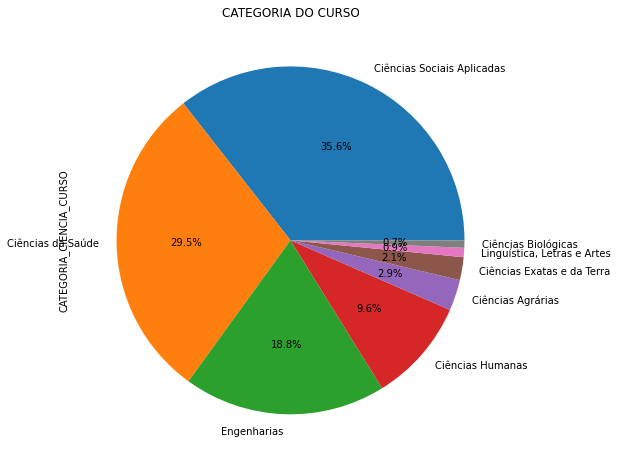

In [ ]:
plot = df8['CATEGORIA_CIENCIA_CURSO'].value_counts(normalize = True).plot.pie(autopct='%1.1f%%',figsize=(8, 8))
plot.set_title("CATEGORIA DO CURSO")

##Analisando os valores por tipo de escola de origem

In [ ]:
df8.ST_ENSINO_MEDIO_ESCOLA_PUBLICA.value_counts()

S    797216
N    192961
P     66985
Name: ST_ENSINO_MEDIO_ESCOLA_PUBLICA, dtype: int64

Text(0.5, 1.0, 'Origem ensino médio')

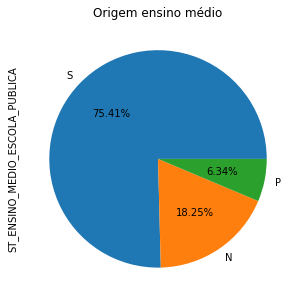

In [ ]:
#pd.set_option('display.float_format', '{:.2%}'.format)
#df8['ST_ENSINO_MEDIO_ESCOLA_PUBLICA'].value_counts(normalize = True)

plot = df8['ST_ENSINO_MEDIO_ESCOLA_PUBLICA'].value_counts(normalize = True).plot.pie(y='mass',autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Origem ensino médio")

##Analisando os valores por Sexo

In [ ]:
df8.DS_SEXO.value_counts()

Feminino     645606
Masculino    411556
Name: DS_SEXO, dtype: int64

Text(0.5, 1.0, 'Sexo dos alunos')

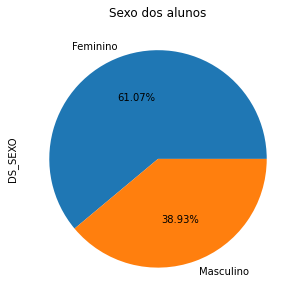

In [ ]:
plot = df8['DS_SEXO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Sexo dos alunos")

##Analisando os valores por Instituição de Ensino superior

In [ ]:
pd.set_option('display.max_rows', 1652)
df8.NO_IES.value_counts()

UNIVERSIDADE PAULISTA                        58055
UNIVERSIDADE ESTÁCIO DE SÁ                   44164
UNIVERSIDADE NOVE DE JULHO                   17624
Centro Universitário Estácio do Ceará        16926
UNIVERSIDADE DE CUIABÁ                       11680
                                             ...  
FACULDADE EVANGÉLICA                             1
FACULDADE LIONS                                  1
Faculdade Faipe                                  1
FACULDADE JESUÍTA DE FILOSOFIA E TEOLOGIA        1
FACULDADE DE TECNOLOGIA FINACI                   1
Name: NO_IES, Length: 1652, dtype: int64

In [ ]:
pd.reset_option("^display")

##Analisando os valores por município da instituição

In [ ]:
pd.set_option('display.max_rows', 496)
df8.NO_MUNICIPIO.value_counts()

São Paulo         180075
Belo Horizonte     98979
Rio de Janeiro     70870
Valinhos           47360
Salvador           43866
                   ...  
Maranguape             1
Jales                  1
Capanema               1
Cianorte               1
Piracanjuba            1
Name: NO_MUNICIPIO, Length: 496, dtype: int64

In [ ]:
pd.reset_option("^display")

##Analisando os valores por presença de deficiência

In [ ]:
df8.ST_DEFICIENCIA.value_counts()

N    1051689
S       5473
Name: ST_DEFICIENCIA, dtype: int64

Text(0.5, 1.0, 'Presença de deficiência no aluno')

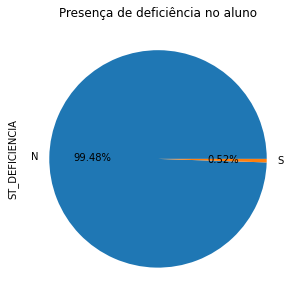

In [ ]:
plot = df8['ST_DEFICIENCIA'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Presença de deficiência no aluno")

##Analisando os valores por raça do estudante

In [ ]:
df8.DS_RACA_COR.value_counts()

Pardo      461328
Branco     446248
Negro      122986
Amarelo     24210
Índio        2390
Name: DS_RACA_COR, dtype: int64

Text(0.5, 1.0, 'Distribuição racial dos estudantes')

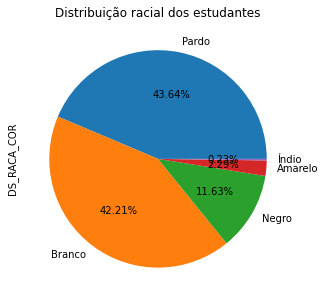

In [ ]:
plot = df8['DS_RACA_COR'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição racial dos estudantes")

##Analise do agente financeiro

In [ ]:
df8.NO_AGENTE_FINANCEIRO.value_counts()

Caixa Econômica Federal    635011
Banco do Brasil            422151
Name: NO_AGENTE_FINANCEIRO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos agentes financeiros')

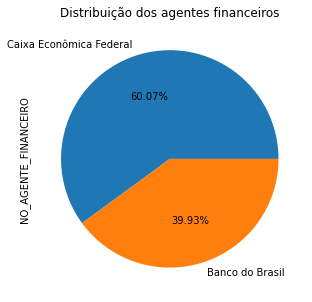

In [ ]:
plot = df8['NO_AGENTE_FINANCEIRO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos agentes financeiros")

##Analise dos estados cívies dos estudantes

In [ ]:
df8.DS_ESTADO_CIVIL.value_counts()

Solteiro         874221
Casado           127507
União estável     26529
Divorciado        21139
Separado           6286
Viúvo              1480
Name: DS_ESTADO_CIVIL, dtype: int64

Text(0.5, 1.0, 'Distribuição dos estados cívies dos estudantes')

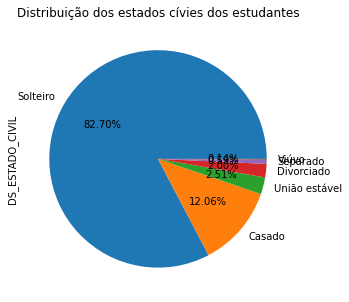

In [ ]:
plot = df8['DS_ESTADO_CIVIL'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos estados cívies dos estudantes")

##Analise da periocidade de pagamento do curso

In [ ]:
df8.DS_PERIODICIDADE_CUR.value_counts()

Semestral     1035342
Anual           21237
Trimestral        583
Name: DS_PERIODICIDADE_CUR, dtype: int64

Text(0.5, 1.0, 'Distribuição da periocidade de pagamento do curso')

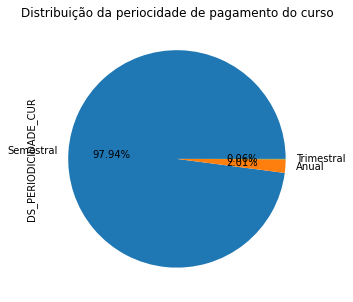

In [ ]:
plot = df8['DS_PERIODICIDADE_CUR'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição da periocidade de pagamento do curso")

##Analise da temporalidade dos pagamentos

In [ ]:
df8.NU_ANO_PROC.value_counts()

2018    1057162
Name: NU_ANO_PROC, dtype: int64

In [ ]:
df8ComLinhasDuplicads.NU_MES_PROC.value_counts()

6    2949692
5    1641687
4    1103791
7    1042400
3     174774
2      46125
Name: NU_MES_PROC, dtype: int64

Text(0.5, 1.0, 'Distribuição dos meses de pagamento')

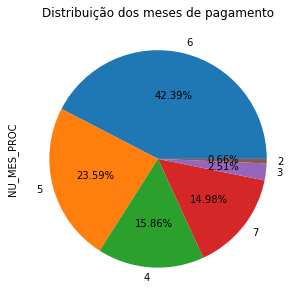

In [ ]:
plot = df8ComLinhasDuplicads['NU_MES_PROC'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos meses de pagamento")

agora analisando a temporalidade do que vai pagar

In [ ]:
df8ComLinhasDuplicads.NU_MES.value_counts()

2     862972
1     862972
3     862967
4     861994
5     860619
6     860014
9     298165
10    298097
8     298087
7     298087
11    297816
12    296679
Name: NU_MES, dtype: int64

Text(0.5, 1.0, 'Distribuição dos meses de pagamento')

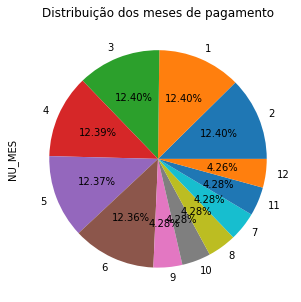

In [ ]:
plot = df8ComLinhasDuplicads['NU_MES'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos meses de pagamento")

In [ ]:
df8.NU_SEMESTRE.value_counts()

1    829144
2    228018
Name: NU_SEMESTRE, dtype: int64

Text(0.5, 1.0, 'Distribuição dos semestres referentes ao pagamento')

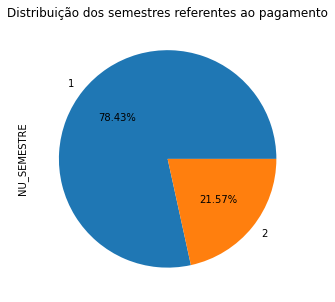

In [ ]:
plot = df8['NU_SEMESTRE'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos semestres referentes ao pagamento")

In [ ]:
df8ComLinhasDuplicads.NU_SEMESTRE.value_counts()

1    5171538
2    1786931
Name: NU_SEMESTRE, dtype: int64

Text(0.5, 1.0, 'Distribuição dos semestres referentes ao pagamento')

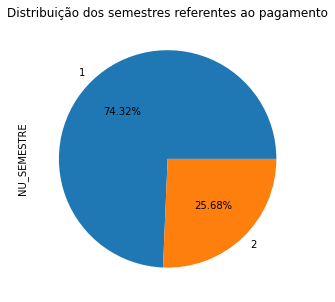

In [ ]:
plot = df8ComLinhasDuplicads['NU_SEMESTRE'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos semestres referentes ao pagamento")

In [ ]:
df8ComLinhasDuplicads.NU_ANO.value_counts()

2018    5094012
2015    1767110
2017      79283
2016       7856
2014       7585
2013       1483
2012        804
2011        312
2010         24
Name: NU_ANO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos anos referentes ao pagamento')

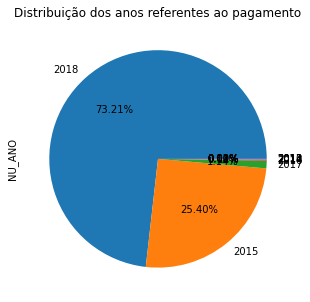

In [ ]:
plot = df8ComLinhasDuplicads['NU_ANO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos anos referentes ao pagamento")

##Analisando os tipos de financeamentos

In [ ]:
df8.TP_FIANCA.value_counts()

F    819756
N    230328
S      7078
Name: TP_FIANCA, dtype: int64

Text(0.5, 1.0, 'Distribuição do tipo de financeamento')

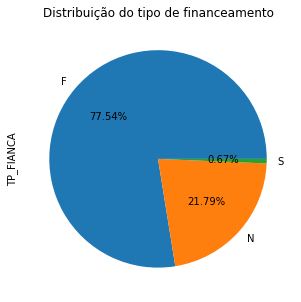

In [ ]:
plot = df8['TP_FIANCA'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição do tipo de financeamento")

##Analise dos tipos de cursos

In [ ]:
df8.DS_TIPO_CURSO.value_counts()

Bacharelado     971206
Licenciatura     55677
Tecnológico      30279
Name: DS_TIPO_CURSO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos tipos de cursos')

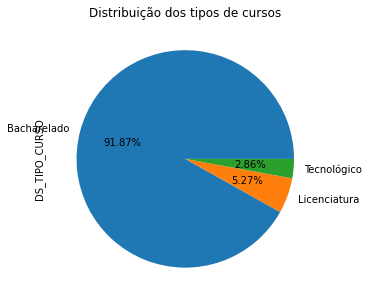

In [ ]:
plot = df8['DS_TIPO_CURSO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos tipos de cursos")

##Informações extras 

In [ ]:
df8.CO_PROCESSO.value_counts()

277    228590
288    179117
280    161709
278    105982
281     89846
286     89724
273     56996
287     54747
282     33530
290     18614
291     10279
274     10235
289      7396
267      3548
271      2579
275      1613
270      1334
285       574
279       332
276       312
283        52
272        33
284        20
Name: CO_PROCESSO, dtype: int64

In [ ]:
df8.NU_ANO_EXERCICIO_INSC.value_counts()

2014.0    352285
2015.0    198731
2013.0    155873
2017.0    142279
2016.0    140294
2012.0     57173
2011.0      9341
2010.0      1162
2009.0        15
2007.0         3
2018.0         3
2008.0         2
2002.0         1
Name: NU_ANO_EXERCICIO_INSC, dtype: int64

In [ ]:
df8.NU_PERCENTUAL_PROUNI.value_counts()

0,00     1031470
50,00      25690
25,00          2
Name: NU_PERCENTUAL_PROUNI, dtype: int64

In [ ]:
df8.NU_PERCENT_SOLICITADO_FINANC.value_counts()

100,00    638174
75,00      52358
50,00      45692
94,00      21177
90,00      20725
           ...  
12,00          3
11,00          2
9,00           1
6,00           1
8,00           1
Name: NU_PERCENT_SOLICITADO_FINANC, Length: 94, dtype: int64

In [ ]:
df8.VL_REPASSE.value_counts()

51331.49    303
55043.89    221
51103.88    213
45026.24    199
52957.96    188
           ... 
54438.56      1
63241.51      1
18394.87      1
49134.06      1
9718.02       1
Name: VL_REPASSE, Length: 863462, dtype: int64

In [ ]:
df8.VL_PERC_FINANCIAMENTO.value_counts()

100,00    638174
75,00      52358
50,00      45692
94,00      21177
90,00      20725
           ...  
12,00          3
11,00          2
9,00           1
6,00           1
8,00           1
Name: VL_PERC_FINANCIAMENTO, Length: 94, dtype: int64

In [ ]:
df8.QT_SEMESTRE_FINANCIADO.value_counts()

10.0    515286
8.0     243317
9.0      85616
7.0      49270
6.0      45907
12.0     36505
11.0     28540
5.0      20676
4.0      19961
13.0      5598
3.0       4797
2.0       1215
14.0       247
1.0        139
15.0        78
16.0         6
17.0         2
18.0         1
36.0         1
Name: QT_SEMESTRE_FINANCIADO, dtype: int64

##Analise do valor repassado

###Analise do valor repassado, utilizando a metrica VL_REPASSE

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df8.VL_REPASSE.sum()

52143174614.10001

In [ ]:
df8.groupby('#SG_UF').sum()['VL_REPASSE'].sort_values(ascending=False)

#SG_UF
SP   14460364864.310
MG    7693472168.180
RJ    4301045949.170
BA    3650601095.580
RS    2658964879.190
MT    2351973260.070
PR    1917625441.760
CE    1912815325.820
PB    1589934289.380
PE    1534753510.550
DF    1371344995.090
GO    1189848881.140
SC    1108103499.180
RN     804705608.580
PA     779289137.020
ES     637701566.380
PI     611600474.940
SE     601913335.580
AM     551387810.540
MA     546001125.260
RO     458828038.320
AP     338005357.090
AC     327868105.900
AL     263700794.460
MS     246966757.840
RR     136802241.250
TO      97556101.520
Name: VL_REPASSE, dtype: float64

In [ ]:
df8_vl_estados_interativo = df8.groupby('#SG_UF').sum()['VL_REPASSE'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df8_vl_estados_interativo.index,
               y=df8_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df8.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

REGIAO
SUDESTE        27092584548.040
NORDESTE       11516025560.150
SUL             5684693820.130
CENTRO-OESTE    5160133894.140
NORTE           2689736791.640
Name: VL_REPASSE, dtype: float64

In [ ]:
df8_vl_regiao_interativo = df8.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df8_vl_regiao_interativo.index,
               y=df8_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df8.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VL_REPASSE'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             20117807181.820
Ciências Sociais Aplicadas    15053781419.020
Engenharias                    9809968646.700
Ciências Humanas               4022221968.730
Ciências Agrárias              2039855385.600
Ciências Exatas e da Terra      627177339.860
Linguística, Letras e Artes     282120687.280
Ciências Biológicas             190241985.090
Name: VL_REPASSE, dtype: float64

In [ ]:
df8_vl_regiao_interativo = df8.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VL_REPASSE'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df8_vl_regiao_interativo.index,
               y=df8_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

###Analise do valor repassado, utilizando a metrica VALOR_SEMESTRE_PAGO

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df8.VALOR_SEMESTRE_PAGO.sum()

7474734520.979998

In [ ]:
df8.groupby('#SG_UF').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

#SG_UF
SP   2052110888.120
MG   1078482765.180
RJ    628461303.610
BA    521597435.820
RS    392605990.490
MT    319642429.910
CE    283601710.630
PR    264442898.540
PB    238687812.660
PE    226654528.260
DF    196417486.070
GO    170249280.320
SC    153188674.210
PA    134213861.570
RN    113588173.010
PI     91195448.080
ES     88736095.640
SE     85864921.640
AM     85134228.190
MA     81329617.920
RO     66760388.830
AC     46374354.740
AP     45210805.460
AL     38326562.380
MS     35243341.810
RR     20607736.420
TO     16005781.470
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df8_vl_estados_interativo = df8.groupby('#SG_UF').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df8_vl_estados_interativo.index,
               y=df8_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df8.groupby('REGIAO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

REGIAO
SUDESTE        3847791052.550
NORDESTE       1680846210.400
SUL             810237563.240
CENTRO-OESTE    721552538.110
NORTE           414307156.680
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df8_vl_regiao_interativo = df8.groupby('REGIAO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df8_vl_regiao_interativo.index,
               y=df8_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df8.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             2891674533.300
Ciências Sociais Aplicadas    2167908420.190
Engenharias                   1358760811.050
Ciências Humanas               584394194.610
Ciências Agrárias              294265449.770
Ciências Exatas e da Terra     102058746.400
Linguística, Letras e Artes     45246664.860
Ciências Biológicas             30425700.800
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df8_vl_regiao_interativo = df8.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df8_vl_regiao_interativo.index,
               y=df8_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

###Analise do valor repassado, utilizando a metrica VALOR_ARQUIVO_PAGO

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df8.VALOR_ARQUIVO_PAGO.sum()

8242832074.609996

In [ ]:
df8.groupby('#SG_UF').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

#SG_UF
SP   2256603170.890
MG   1238988788.170
RJ    724063612.290
BA    584424547.540
RS    407690486.810
MT    375300506.200
CE    304972849.520
PR    270143303.040
PE    259816707.810
PB    252395954.130
DF    200456087.650
GO    177492125.770
SC    157670951.980
PA    142154620.560
RN    135463428.770
PI    100152782.320
AM     97068516.790
SE     89661671.740
ES     89540320.830
MA     87139386.220
RO     67233213.850
AP     59558477.970
AC     46502486.440
AL     41709943.990
MS     36506861.770
RR     23857030.110
TO     16264241.450
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df8_vl_estados_interativo = df8.groupby('#SG_UF').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df8_vl_estados_interativo.index,
               y=df8_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df8.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

REGIAO
SUDESTE        27092584548.040
NORDESTE       11516025560.150
SUL             5684693820.130
CENTRO-OESTE    5160133894.140
NORTE           2689736791.640
Name: VL_REPASSE, dtype: float64

In [ ]:
df8_vl_regiao_interativo = df8.groupby('REGIAO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df8_vl_regiao_interativo.index,
               y=df8_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df8.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             3122753911.730
Ciências Sociais Aplicadas    2404594764.210
Engenharias                   1543902471.270
Ciências Humanas               658610198.830
Ciências Agrárias              322451080.290
Ciências Exatas e da Terra     109816849.170
Linguística, Letras e Artes     48306417.970
Ciências Biológicas             32396381.140
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df8_vl_regiao_interativo = df8.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df8_vl_regiao_interativo.index,
               y=df8_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

#Analises de 2018.2

##Analisando os valores por estado.

In [ ]:
df17['#SG_UF'].value_counts()

SP    173151
MG     98272
BA     54964
RJ     53160
RS     34684
CE     33310
PR     32690
PE     26389
PB     22174
DF     21241
GO     19249
MT     18292
SC     16393
PA     15940
PI     11206
SE     10873
RN     10763
AM     10513
ES     10170
MA      9272
RO      7114
MS      5525
AL      5087
AC      4864
AP      2487
RR      2173
TO      1735
Name: #SG_UF, dtype: int64

In [ ]:
df17_estados_interativo = df17['#SG_UF'].value_counts()

data_por_genero_interativo = [go.Bar(x=df17_estados_interativo.index,
               y=df17_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='quantidade de estudantes por estado',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por estado')

plt.show()

##Analisando os valores por região

In [ ]:
df17.REGIAO.value_counts()

SUDESTE         334753
NORDESTE        184038
SUL              83767
CENTRO-OESTE     64307
NORTE            44826
Name: REGIAO, dtype: int64

In [ ]:
df17_regiao_interativo = df17.REGIAO.value_counts()

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df17_regiao_interativo.index,
               y=df17_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='quantidade de estudantes por região',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por região')

plt.show()

##Analisando os valores por curso

In [ ]:
pd.set_option('display.max_rows', 304)
df17.DS_CURSO.value_counts()

DIREITO                                                                 140275
ENGENHARIA CIVIL                                                         65749
ENFERMAGEM                                                               62749
PSICOLOGIA                                                               52080
FISIOTERAPIA                                                             36768
ARQUITETURA E URBANISMO                                                  29825
ADMINISTRAÇÃO                                                            29191
ODONTOLOGIA                                                              26854
MEDICINA                                                                 24816
FARMÁCIA                                                                 21349
ENGENHARIA DE PRODUÇÃO                                                   20336
ENGENHARIA MECÂNICA                                                      18622
CIÊNCIAS CONTÁBEIS                                  

In [ ]:
pd.reset_option("^display")

In [ ]:
df17_curso_interativo = df17.DS_CURSO.value_counts()

cores2 = sns.color_palette("Paired")

data_por_curso_interativo = [go.Bar(x=df17_curso_interativo.index,
               y=df17_curso_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='quantidade de estudantes por curso',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'curso'}                              
                                )

fig = go.Figure(data = data_por_curso_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por curso')

plt.show()

##Analisando os valores por categoria do curso

In [ ]:
df17.CATEGORIA_CIENCIA_CURSO.value_counts()

Ciências Sociais Aplicadas     240994
Ciências da Saúde              221961
Engenharias                    140330
Ciências Humanas                64134
Ciências Agrárias               24857
Ciências Exatas e da Terra      11965
Linguística, Letras e Artes      4056
Ciências Biológicas              3394
Name: CATEGORIA_CIENCIA_CURSO, dtype: int64

Text(0.5, 1.0, 'CATEGORIA DO CURSO')

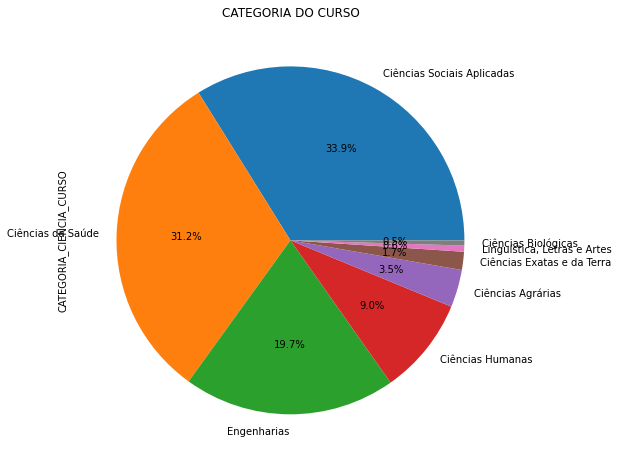

In [ ]:
plot = df17['CATEGORIA_CIENCIA_CURSO'].value_counts(normalize = True).plot.pie(autopct='%1.1f%%',figsize=(8, 8))
plot.set_title("CATEGORIA DO CURSO")

##Analisando os valores por tipo de escola de origem

In [ ]:
df17.ST_ENSINO_MEDIO_ESCOLA_PUBLICA.value_counts()

S    526024
N    140756
P     44911
Name: ST_ENSINO_MEDIO_ESCOLA_PUBLICA, dtype: int64

Text(0.5, 1.0, 'Origem ensino médio')

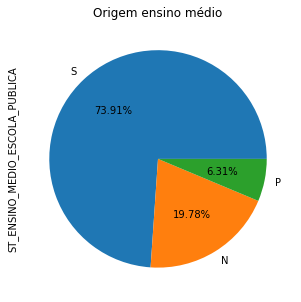

In [ ]:
plot = df17['ST_ENSINO_MEDIO_ESCOLA_PUBLICA'].value_counts(normalize = True).plot.pie(y='mass',autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Origem ensino médio")

##Analisando os valores por Sexo

In [ ]:
df17.DS_SEXO.value_counts()

Feminino     435866
Masculino    275825
Name: DS_SEXO, dtype: int64

Text(0.5, 1.0, 'Sexo dos alunos')

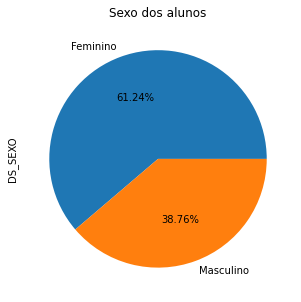

In [ ]:
plot = df17['DS_SEXO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Sexo dos alunos")

##Analisando os valores por Instituição de Ensino superior

In [ ]:
pd.set_option('display.max_rows', 1590)
df17.NO_IES.value_counts()

UNIVERSIDADE PAULISTA                            28789
UNIVERSIDADE ESTÁCIO DE SÁ                       22546
Centro Universitário Estácio do Ceará             7464
UNIVERSIDADE NOVE DE JULHO                        6735
UNIVERSIDADE POTIGUAR                             5718
                                                 ...  
FACULDADE DE CIÊNCIAS SOCIAIS APLICADAS IBMEC        1
FACULDADE DE EDUCAÇÃO DE GUARATINGUETÁ               1
FACULDADE DE TECNOLOGIA FINACI                       1
Faculdades Sulamérica Bahia                          1
FACULDADE DO VALE ELVIRA DAYRELL - FAVED             1
Name: NO_IES, Length: 1590, dtype: int64

In [ ]:
pd.reset_option("^display")

##Analisando os valores por município da instituição

In [ ]:
pd.set_option('display.max_rows', 384)
df17.NO_MUNICIPIO.value_counts()

São Paulo               87694
Belo Horizonte          61286
Rio de Janeiro          38597
Valinhos                36753
Salvador                28704
                        ...  
Fátima do Sul               1
Ilha Solteira               1
Colinas do Tocantins        1
Camaquã                     1
Cianorte                    1
Name: NO_MUNICIPIO, Length: 462, dtype: int64

In [ ]:
pd.reset_option("^display")

##Analisando os valores por presença de deficiência

In [ ]:
df17.ST_DEFICIENCIA.value_counts()

N    708133
S      3558
Name: ST_DEFICIENCIA, dtype: int64

Text(0.5, 1.0, 'Presença de deficiência no aluno')

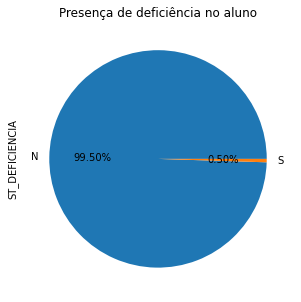

In [ ]:
plot = df17['ST_DEFICIENCIA'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Presença de deficiência no aluno")

##Analisando os valores por raça do estudante

In [ ]:
df17.DS_RACA_COR.value_counts()

Pardo      310415
Branco     305414
Negro       78150
Amarelo     16215
Índio        1497
Name: DS_RACA_COR, dtype: int64

Text(0.5, 1.0, 'Distribuição racial dos estudantes')

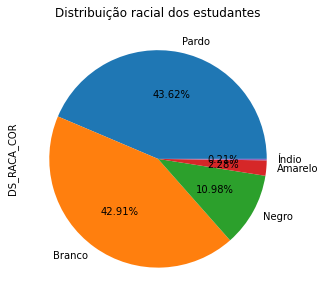

In [ ]:
plot = df17['DS_RACA_COR'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição racial dos estudantes")

##Analise do agente financeiro

In [ ]:
df17.NO_AGENTE_FINANCEIRO.value_counts()

Caixa Econômica Federal    429714
Banco do Brasil            281977
Name: NO_AGENTE_FINANCEIRO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos agentes financeiros')

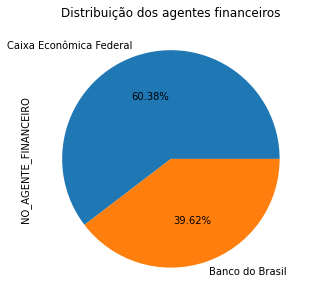

In [ ]:
plot = df17['NO_AGENTE_FINANCEIRO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos agentes financeiros")

##Analise dos estados cívies dos estudantes

In [ ]:
df17.DS_ESTADO_CIVIL.value_counts()

Solteiro         601908
Casado            76319
União estável     17109
Divorciado        12188
Separado           3418
Viúvo               749
Name: DS_ESTADO_CIVIL, dtype: int64

Text(0.5, 1.0, 'Distribuição dos estados cívies dos estudantes')

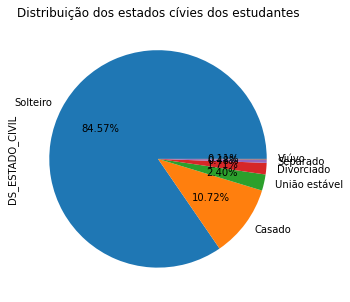

In [ ]:
plot = df17['DS_ESTADO_CIVIL'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos estados cívies dos estudantes")

##Analise da periocidade de pagamento do curso

In [ ]:
df17.DS_PERIODICIDADE_CUR.value_counts()

Semestral     692557
Anual          18700
Trimestral       434
Name: DS_PERIODICIDADE_CUR, dtype: int64

Text(0.5, 1.0, 'Distribuição da periocidade de pagamento do curso')

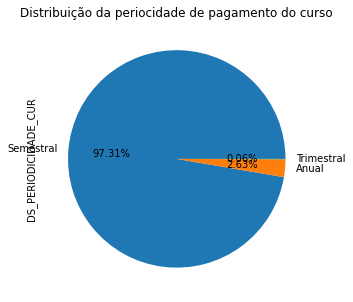

In [ ]:
plot = df17['DS_PERIODICIDADE_CUR'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição da periocidade de pagamento do curso")




























##Analise da temporalidade dos pagamentos

In [ ]:
df17.NU_ANO_PROC.value_counts()

2018    711691
Name: NU_ANO_PROC, dtype: int64

In [ ]:
df17ComLinhasDuplicads.NU_MES_PROC.value_counts()

12    1245578
11    1239438
10     751718
9      341949
8       57781
Name: NU_MES_PROC, dtype: int64

Text(0.5, 1.0, 'Distribuição dos meses de pagamento')

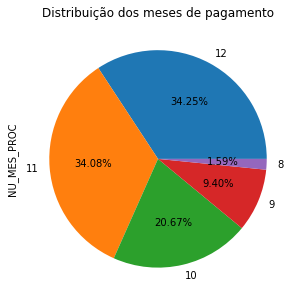

In [ ]:
plot = df17ComLinhasDuplicads['NU_MES_PROC'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos meses de pagamento")

agora analisando a temporalidade do que vai pagar

In [ ]:
df17ComLinhasDuplicads.NU_MES.value_counts()

8     703830
7     703830
9     703818
10    703361
11    702577
2      19634
1      19633
3      19633
6      19532
5      19389
4      19305
12      1922
Name: NU_MES, dtype: int64

Text(0.5, 1.0, 'Distribuição dos meses de pagamento')

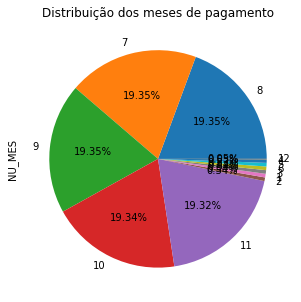

In [ ]:
plot = df17ComLinhasDuplicads['NU_MES'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos meses de pagamento")

In [ ]:
df17.NU_SEMESTRE.value_counts()

2    692826
1     18865
Name: NU_SEMESTRE, dtype: int64

Text(0.5, 1.0, 'Distribuição dos semestres referentes ao pagamento')

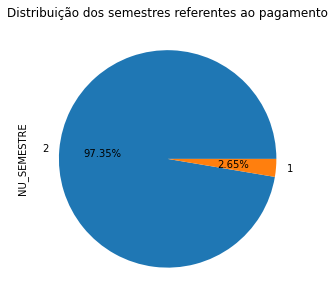

In [ ]:
plot = df17['NU_SEMESTRE'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos semestres referentes ao pagamento")

In [ ]:
df17ComLinhasDuplicads.NU_SEMESTRE.value_counts()

2    3519338
1     117126
Name: NU_SEMESTRE, dtype: int64

Text(0.5, 1.0, 'Distribuição dos semestres referentes ao pagamento')

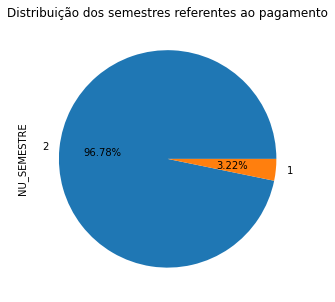

In [ ]:
plot = df17ComLinhasDuplicads['NU_SEMESTRE'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos semestres referentes ao pagamento")

In [ ]:
df17ComLinhasDuplicads.NU_ANO.value_counts()

2018    3617671
2017       9998
2015       4811
2016       2925
2014        606
2013        285
2012        120
2011         42
2010          6
Name: NU_ANO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos anos referentes ao pagamento')

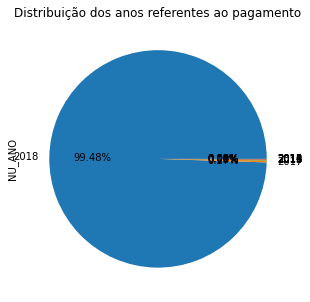

In [ ]:
plot = df17ComLinhasDuplicads['NU_ANO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos anos referentes ao pagamento")

##Analisando os tipos de financeamentos

In [ ]:
df17.TP_FIANCA.value_counts()

F    552945
N    155464
S      3282
Name: TP_FIANCA, dtype: int64

Text(0.5, 1.0, 'Distribuição do tipo de financeamento')

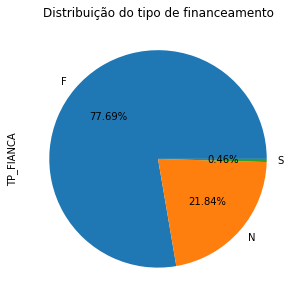

In [ ]:
plot = df17['TP_FIANCA'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição do tipo de financeamento")

##Analise dos tipos de cursos

In [ ]:
df17.DS_TIPO_CURSO.value_counts()

Bacharelado     679458
Licenciatura     21809
Tecnológico      10424
Name: DS_TIPO_CURSO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos tipos de cursos')

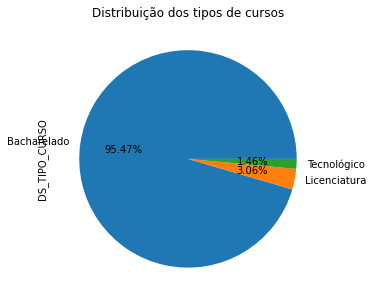

In [ ]:
plot = df17['DS_TIPO_CURSO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos tipos de cursos")

##Informações extras 

In [ ]:
df17.CO_PROCESSO.value_counts()

300    135158
298    131798
296    124041
301     82989
302     75789
299     64625
305     55507
297     32209
292      5991
293      3312
294       243
295        29
Name: CO_PROCESSO, dtype: int64

In [ ]:
df17.NU_ANO_EXERCICIO_INSC.value_counts()

2014.0    233901
2015.0    169208
2017.0    130102
2016.0    128620
2013.0     47763
2012.0      1956
2011.0       104
2010.0        31
2009.0         5
2002.0         1
Name: NU_ANO_EXERCICIO_INSC, dtype: int64

In [ ]:
df17.NU_PERCENTUAL_PROUNI.value_counts()

0,00     691868
50,00     19822
25,00         1
Name: NU_PERCENTUAL_PROUNI, dtype: int64

In [ ]:
df17.NU_PERCENT_SOLICITADO_FINANC.value_counts()

100,00    368939
75,00      32270
50,00      27365
94,00      19581
95,00      18711
           ...  
17,00          6
14,00          5
12,00          3
11,00          2
9,00           1
Name: NU_PERCENT_SOLICITADO_FINANC, Length: 92, dtype: int64

In [ ]:
df17.VL_REPASSE.value_counts()

51103.88    213
42296.78    176
78679.62    147
85247.40    143
46447.84    139
           ... 
26489.40      1
32238.07      1
30488.28      1
47776.73      1
12345.71      1
Name: VL_REPASSE, Length: 590955, dtype: int64

In [ ]:
df17.VL_PERC_FINANCIAMENTO.value_counts()

100,00    368939
75,00      32270
50,00      27365
94,00      19581
95,00      18711
           ...  
17,00          6
14,00          5
12,00          3
11,00          2
9,00           1
Name: VL_PERC_FINANCIAMENTO, Length: 92, dtype: int64

In [ ]:
df17.QT_SEMESTRE_FINANCIADO.value_counts()

10.0    396760
8.0     134402
9.0      59294
12.0     32304
7.0      24480
11.0     23640
6.0      20165
5.0       7669
4.0       6179
13.0      5036
3.0       1246
14.0       249
2.0        160
15.0        88
1.0          8
16.0         7
17.0         1
18.0         1
36.0         1
20.0         1
Name: QT_SEMESTRE_FINANCIADO, dtype: int64

##Analise do valor repassado

###Analise do valor repassado, utilizando a metrica VL_REPASSE

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df17.VL_REPASSE.sum()

37234712063.15

In [ ]:
df17.groupby('#SG_UF').sum()['VL_REPASSE'].sort_values(ascending=False)

#SG_UF
SP   9314200096.830
MG   5664713652.130
RJ   2806550391.830
BA   2641534898.190
RS   2139683805.360
PR   1867195599.950
CE   1614418335.120
MT   1327537012.160
PB   1242752602.510
DF   1138337717.130
PE   1045266619.360
SC    925111430.100
GO    903989319.830
PA    624984525.040
ES    534402741.130
SE    513518009.420
RN    496791743.160
RO    393374366.890
AM    385344583.700
PI    378022462.300
MA    365629889.050
AC    260651535.130
AL    197274117.410
MS    195202764.170
AP    117393058.370
RR     84394954.500
TO     56435832.380
Name: VL_REPASSE, dtype: float64

In [ ]:
df17_vl_estados_interativo = df17.groupby('#SG_UF').sum()['VL_REPASSE'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df17_vl_estados_interativo.index,
               y=df17_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df17.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

REGIAO
SUDESTE        18319866881.920
NORDESTE        8495208676.520
SUL             4931990835.410
CENTRO-OESTE    3565066813.290
NORTE           1922578856.010
Name: VL_REPASSE, dtype: float64

In [ ]:
df17_vl_regiao_interativo = df17.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df17_vl_regiao_interativo.index,
               y=df17_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df17.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VL_REPASSE'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             15349203624.280
Ciências Sociais Aplicadas     9986493487.950
Engenharias                    7062312608.110
Ciências Humanas               2608162115.790
Ciências Agrárias              1672999260.610
Ciências Exatas e da Terra      344710503.700
Linguística, Letras e Artes     122318679.960
Ciências Biológicas              88511782.750
Name: VL_REPASSE, dtype: float64

In [ ]:
df17_vl_regiao_interativo = df17.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VL_REPASSE'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df17_vl_regiao_interativo.index,
               y=df17_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

###Analise do valor repassado, utilizando a metrica VALOR_SEMESTRE_PAGO

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df17.VALOR_SEMESTRE_PAGO.sum()

4621705765.280001

In [ ]:
df17.groupby('#SG_UF').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

#SG_UF
SP   1149320428.880
MG    689511262.650
RJ    354478022.390
BA    326893732.390
RS    265968149.190
PR    219299870.200
CE    205268306.730
PB    166127799.950
MT    155374308.640
DF    137575080.940
PE    134083303.540
GO    112018489.080
SC    109016826.170
PA     95616578.490
ES     62368754.940
SE     61683960.020
RN     61681982.950
PI     51594185.730
AM     50883886.160
RO     48889695.990
MA     48608388.320
AC     31165487.560
AL     25113156.520
MS     23279430.610
AP     15529462.490
RR     10807466.900
TO      9547747.850
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df17_vl_estados_interativo = df17.groupby('#SG_UF').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df17_vl_estados_interativo.index,
               y=df17_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df17.groupby('REGIAO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

REGIAO
SUDESTE        2255678468.860
NORDESTE       1081054816.150
SUL             594284845.560
CENTRO-OESTE    428247309.270
NORTE           262440325.440
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df17_vl_regiao_interativo = df17.groupby('REGIAO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df17_vl_regiao_interativo.index,
               y=df17_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df17.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             1929215354.880
Ciências Sociais Aplicadas    1238205280.110
Engenharias                    842318157.680
Ciências Humanas               327445638.630
Ciências Agrárias              208553684.000
Ciências Exatas e da Terra      47280549.610
Linguística, Letras e Artes     16590398.660
Ciências Biológicas             12096701.710
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df17_vl_regiao_interativo = df17.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df17_vl_regiao_interativo.index,
               y=df17_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

###Analise do valor repassado, utilizando a metrica VALOR_ARQUIVO_PAGO

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df17.VALOR_ARQUIVO_PAGO.sum()

4691031843.740001

In [ ]:
df17.groupby('#SG_UF').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

#SG_UF
SP   1170321359.080
MG    698631338.400
RJ    360097100.960
BA    330323042.960
RS    270101189.800
PR    222174196.910
CE    208032779.470
PB    168065902.120
MT    157117906.700
DF    140209454.850
PE    135971517.710
GO    113778949.490
SC    111297202.060
PA     96800823.170
ES     63127072.890
SE     62711310.580
RN     62495056.260
PI     52248107.290
AM     51440633.760
RO     49546276.800
MA     49295169.890
AC     31825224.300
AL     25422609.130
MS     23699159.770
AP     15719600.240
RR     10919068.750
TO      9659790.400
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df17_vl_estados_interativo = df17.groupby('#SG_UF').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df17_vl_estados_interativo.index,
               y=df17_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df17.groupby('REGIAO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

REGIAO
SUDESTE        2292176871.330
NORDESTE       1094565495.410
SUL             603572588.770
CENTRO-OESTE    434805470.810
NORTE           265911417.420
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df17_vl_regiao_interativo = df17.groupby('REGIAO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df17_vl_regiao_interativo.index,
               y=df17_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df17.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             1956803178.640
Ciências Sociais Aplicadas    1257803791.350
Engenharias                    855043903.720
Ciências Humanas               332571172.020
Ciências Agrárias              211432619.780
Ciências Exatas e da Terra      48145256.820
Linguística, Letras e Artes     16885061.560
Ciências Biológicas             12346859.850
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df17_vl_regiao_interativo = df17.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df17_vl_regiao_interativo.index,
               y=df17_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")